# GENERATIVE ADVERSARIAL NETWORK

### IMPORT

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets.mnist import load_data
import os
import cv2
%matplotlib inline

### MODEL

In [23]:
class Gan:
    
    def __init__(self, x_shape, dim_lat):
        
        self.dim_lat = dim_lat
        self.x_shape = x_shape
        
        self.generator = self.create_generator()
        self.generator.summary()
        
        self.discriminator = self.create_discriminator()
        self.discriminator.summary()
        
        self.gan = self.create_gan()
        self.gan.summary()
        
        
    def create_generator(self):
        
        generator = keras.Sequential()
        generator.add(layers.Dense(200, input_dim=self.dim_lat))
        generator.add(layers.LeakyReLU(0.1))
        generator.add(layers.Dense(100))
        generator.add(layers.LeakyReLU(0.1))
        generator.add(layers.Dense(self.x_shape, activation="tanh"))

        generator.compile(loss='binary_crossentropy', optimizer="adam")
        return generator
    
    def create_discriminator(self):
        
        discriminator = keras.Sequential()
        discriminator.add(layers.Dense(200, input_dim=self.x_shape))
        discriminator.add(layers.LeakyReLU(0.1))
        discriminator.add(layers.Dense(100))
        discriminator.add(layers.LeakyReLU(0.1))
        discriminator.add(layers.Dense(1, activation="sigmoid"))

        discriminator.compile(loss='binary_crossentropy', optimizer="adam")
        return discriminator
    
    def create_gan(self):
        
        self.discriminator.trainable = False
        gan_input = layers.Input(self.dim_lat)
        x = self.generator(gan_input)
        gan_output= self.discriminator(x)
        gan = Model(inputs=gan_input, outputs=gan_output)
        gan.compile(loss="binary_crossentropy", optimizer="adam")
        return gan
    
    def plot_result(self, img_shape, rgb=False):
        
        noise = np.random.uniform(0, 1, (1, self.dim_lat))
        gen_img = self.generator(noise).numpy()
        
        if rgb:
            
            gen_img = np.abs(gen_img * 255.0)
            plt.imshow(gen_img.reshape(img_shape).astype(int))
            
        else:
            plt.imshow(gen_img.reshape(img_shape))

        plt.show()
    
    def train(self, x_train, epochs=1, batch_size=1, plot=False, rgb=False, img_shape=None):
        
        for e in range(epochs):
            
            print("epochs... " + str(e))
            
            # generation 
            
            noise = np.random.uniform(0, 1, [batch_size, self.dim_lat])
            gen_img = self.generator.predict(noise)
            
            # real data
            batch_img = x_train[np.random.randint(low=0, high=x_train.shape[0], size=batch_size)]
            
            # bactch
            x = np.concatenate([batch_img, gen_img])
            
            # labelisation 
            y_dis = np.zeros(2 * batch_size)
            y_dis[:batch_size] = 1.0
            
            # train discrimintor
            self.discriminator.trainable = True
            self.discriminator.train_on_batch(x, y_dis)
            
            # train gan
            noise = np.random.normal(0,1, [batch_size, self.dim_lat])
            y_gen = np.ones(batch_size)
            self.discriminator.trainable = False
            self.gan.train_on_batch(noise, y_gen)
            
            if plot and e % 100 == 0:
                
                self.plot_result(img_shape, rgb)

## TEST CASE

#### DATA

In [24]:
trial = np.array([[1, 1], [1, 0.5], [3, 3], [3, 3.5], [5, 5], [5, 5.5]])
trial = trial / 100.0

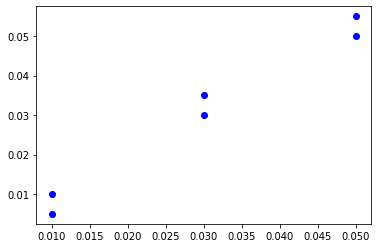

In [25]:
plt.scatter(trial[:, 0], trial[:, 1], color="blue")
plt.show()

#### TRAIN

Dimension latente: 1
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 200)               400       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 202       
Total params: 20,702
Trainable params: 20,702
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
Layer

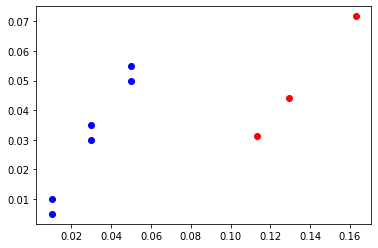

Dimension latente: 2
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 200)               600       
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 202       
Total params: 20,902
Trainable params: 20,902
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
Layer

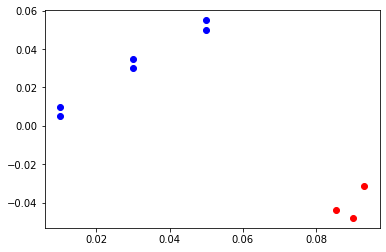

Dimension latente: 3
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 200)               800       
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 202       
Total params: 21,102
Trainable params: 21,102
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_25"
_________________________________________________________________
Layer

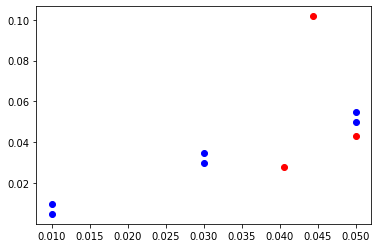

Dimension latente: 4
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 200)               1000      
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 2)                 202       
Total params: 21,302
Trainable params: 21,302
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_27"
_________________________________________________________________
Layer

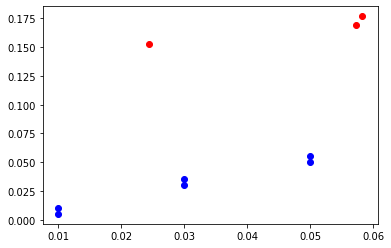

In [26]:
for d in range(1, 5):
    
    print("Dimension latente: " + str(d))
    gan = Gan(2, d)
    gan.train(trial, epochs=10, batch_size=1)
    
    noise = np.random.uniform(0, 1, [3, gan.dim_lat])
    gen = gan.generator(noise)
    plt.scatter(trial[:, 0], trial[:, 1], color="blue")
    plt.scatter(gen.numpy()[:, 0], gen.numpy()[:, 1], color="red")
    plt.show()

### MINST DIGITS

#### DATA

In [27]:
def get_dataset():
    
    (x_train, y_train), (x_test, y_test) = load_data()
    x_train = x_train.astype('float64') / 255.0
    x_test = x_test.astype('float64') / 255.0
    return x_train, x_test, y_train, y_test

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Training examples


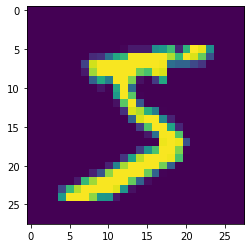

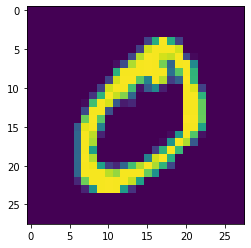

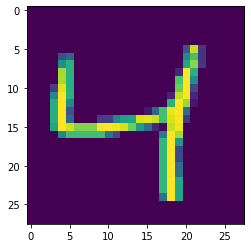

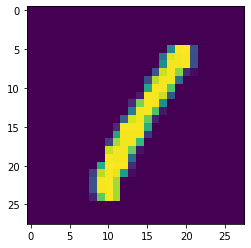

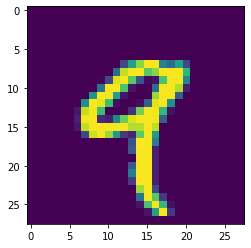

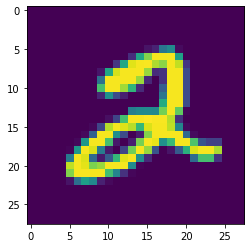

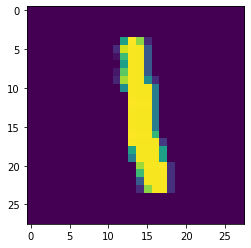

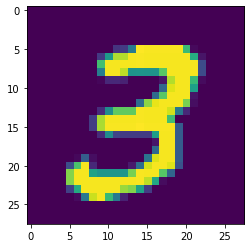

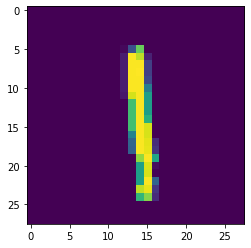

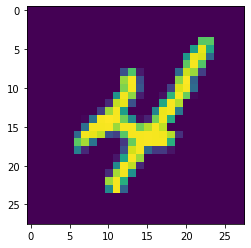

Test examples


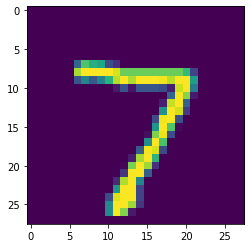

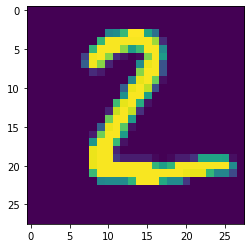

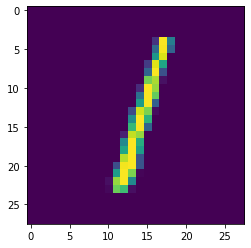

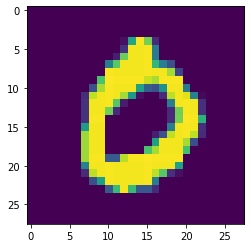

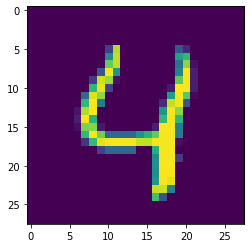

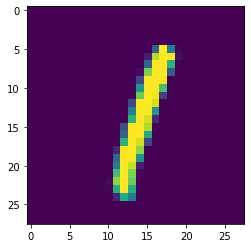

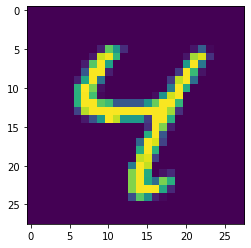

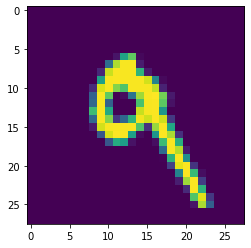

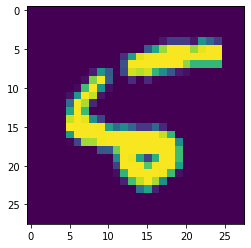

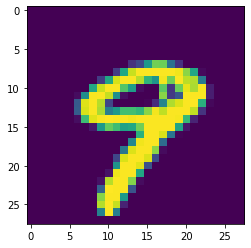

In [29]:
x_train, x_test, y_train, y_test = get_dataset()

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

In [30]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (60000, 784)
x_test shape: (10000, 784)


#### MODEL

In [31]:
gan = Gan(784, 100)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 200)               20200     
_________________________________________________________________
leaky_re_lu_56 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_57 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 784)               79184     
Total params: 119,484
Trainable params: 119,484
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_29"
_________________________________________________________________
Layer (type)            

#### TRAIN

epochs... 0


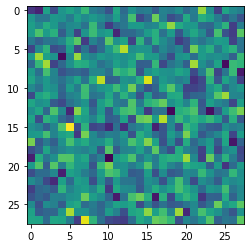

epochs... 1
epochs... 2
epochs... 3
epochs... 4
epochs... 5
epochs... 6
epochs... 7
epochs... 8
epochs... 9
epochs... 10
epochs... 11
epochs... 12
epochs... 13
epochs... 14
epochs... 15
epochs... 16
epochs... 17
epochs... 18
epochs... 19
epochs... 20
epochs... 21
epochs... 22
epochs... 23
epochs... 24
epochs... 25
epochs... 26
epochs... 27
epochs... 28
epochs... 29
epochs... 30
epochs... 31
epochs... 32
epochs... 33
epochs... 34
epochs... 35
epochs... 36
epochs... 37
epochs... 38
epochs... 39
epochs... 40
epochs... 41
epochs... 42
epochs... 43
epochs... 44
epochs... 45
epochs... 46
epochs... 47
epochs... 48
epochs... 49
epochs... 50
epochs... 51
epochs... 52
epochs... 53
epochs... 54
epochs... 55
epochs... 56
epochs... 57
epochs... 58
epochs... 59
epochs... 60
epochs... 61
epochs... 62
epochs... 63
epochs... 64
epochs... 65
epochs... 66
epochs... 67
epochs... 68
epochs... 69
epochs... 70
epochs... 71
epochs... 72
epochs... 73
epochs... 74
epochs... 75
epochs... 76
epochs... 77
epochs..

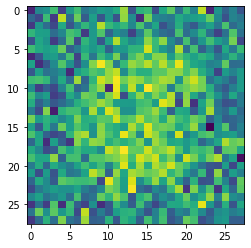

epochs... 101
epochs... 102
epochs... 103
epochs... 104
epochs... 105
epochs... 106
epochs... 107
epochs... 108
epochs... 109
epochs... 110
epochs... 111
epochs... 112
epochs... 113
epochs... 114
epochs... 115
epochs... 116
epochs... 117
epochs... 118
epochs... 119
epochs... 120
epochs... 121
epochs... 122
epochs... 123
epochs... 124
epochs... 125
epochs... 126
epochs... 127
epochs... 128
epochs... 129
epochs... 130
epochs... 131
epochs... 132
epochs... 133
epochs... 134
epochs... 135
epochs... 136
epochs... 137
epochs... 138
epochs... 139
epochs... 140
epochs... 141
epochs... 142
epochs... 143
epochs... 144
epochs... 145
epochs... 146
epochs... 147
epochs... 148
epochs... 149
epochs... 150
epochs... 151
epochs... 152
epochs... 153
epochs... 154
epochs... 155
epochs... 156
epochs... 157
epochs... 158
epochs... 159
epochs... 160
epochs... 161
epochs... 162
epochs... 163
epochs... 164
epochs... 165
epochs... 166
epochs... 167
epochs... 168
epochs... 169
epochs... 170
epochs... 171
epochs

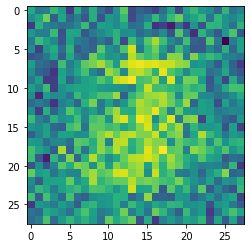

epochs... 201
epochs... 202
epochs... 203
epochs... 204
epochs... 205
epochs... 206
epochs... 207
epochs... 208
epochs... 209
epochs... 210
epochs... 211
epochs... 212
epochs... 213
epochs... 214
epochs... 215
epochs... 216
epochs... 217
epochs... 218
epochs... 219
epochs... 220
epochs... 221
epochs... 222
epochs... 223
epochs... 224
epochs... 225
epochs... 226
epochs... 227
epochs... 228
epochs... 229
epochs... 230
epochs... 231
epochs... 232
epochs... 233
epochs... 234
epochs... 235
epochs... 236
epochs... 237
epochs... 238
epochs... 239
epochs... 240
epochs... 241
epochs... 242
epochs... 243
epochs... 244
epochs... 245
epochs... 246
epochs... 247
epochs... 248
epochs... 249
epochs... 250
epochs... 251
epochs... 252
epochs... 253
epochs... 254
epochs... 255
epochs... 256
epochs... 257
epochs... 258
epochs... 259
epochs... 260
epochs... 261
epochs... 262
epochs... 263
epochs... 264
epochs... 265
epochs... 266
epochs... 267
epochs... 268
epochs... 269
epochs... 270
epochs... 271
epochs

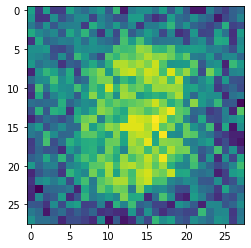

epochs... 301
epochs... 302
epochs... 303
epochs... 304
epochs... 305
epochs... 306
epochs... 307
epochs... 308
epochs... 309
epochs... 310
epochs... 311
epochs... 312
epochs... 313
epochs... 314
epochs... 315
epochs... 316
epochs... 317
epochs... 318
epochs... 319
epochs... 320
epochs... 321
epochs... 322
epochs... 323
epochs... 324
epochs... 325
epochs... 326
epochs... 327
epochs... 328
epochs... 329
epochs... 330
epochs... 331
epochs... 332
epochs... 333
epochs... 334
epochs... 335
epochs... 336
epochs... 337
epochs... 338
epochs... 339
epochs... 340
epochs... 341
epochs... 342
epochs... 343
epochs... 344
epochs... 345
epochs... 346
epochs... 347
epochs... 348
epochs... 349
epochs... 350
epochs... 351
epochs... 352
epochs... 353
epochs... 354
epochs... 355
epochs... 356
epochs... 357
epochs... 358
epochs... 359
epochs... 360
epochs... 361
epochs... 362
epochs... 363
epochs... 364
epochs... 365
epochs... 366
epochs... 367
epochs... 368
epochs... 369
epochs... 370
epochs... 371
epochs

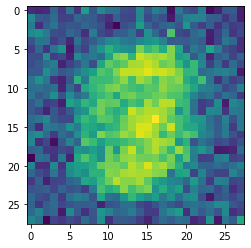

epochs... 401
epochs... 402
epochs... 403
epochs... 404
epochs... 405
epochs... 406
epochs... 407
epochs... 408
epochs... 409
epochs... 410
epochs... 411
epochs... 412
epochs... 413
epochs... 414
epochs... 415
epochs... 416
epochs... 417
epochs... 418
epochs... 419
epochs... 420
epochs... 421
epochs... 422
epochs... 423
epochs... 424
epochs... 425
epochs... 426
epochs... 427
epochs... 428
epochs... 429
epochs... 430
epochs... 431
epochs... 432
epochs... 433
epochs... 434
epochs... 435
epochs... 436
epochs... 437
epochs... 438
epochs... 439
epochs... 440
epochs... 441
epochs... 442
epochs... 443
epochs... 444
epochs... 445
epochs... 446
epochs... 447
epochs... 448
epochs... 449
epochs... 450
epochs... 451
epochs... 452
epochs... 453
epochs... 454
epochs... 455
epochs... 456
epochs... 457
epochs... 458
epochs... 459
epochs... 460
epochs... 461
epochs... 462
epochs... 463
epochs... 464
epochs... 465
epochs... 466
epochs... 467
epochs... 468
epochs... 469
epochs... 470
epochs... 471
epochs

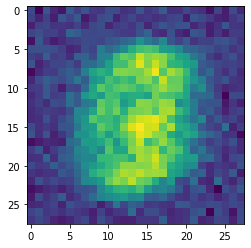

epochs... 501
epochs... 502
epochs... 503
epochs... 504
epochs... 505
epochs... 506
epochs... 507
epochs... 508
epochs... 509
epochs... 510
epochs... 511
epochs... 512
epochs... 513
epochs... 514
epochs... 515
epochs... 516
epochs... 517
epochs... 518
epochs... 519
epochs... 520
epochs... 521
epochs... 522
epochs... 523
epochs... 524
epochs... 525
epochs... 526
epochs... 527
epochs... 528
epochs... 529
epochs... 530
epochs... 531
epochs... 532
epochs... 533
epochs... 534
epochs... 535
epochs... 536
epochs... 537
epochs... 538
epochs... 539
epochs... 540
epochs... 541
epochs... 542
epochs... 543
epochs... 544
epochs... 545
epochs... 546
epochs... 547
epochs... 548
epochs... 549
epochs... 550
epochs... 551
epochs... 552
epochs... 553
epochs... 554
epochs... 555
epochs... 556
epochs... 557
epochs... 558
epochs... 559
epochs... 560
epochs... 561
epochs... 562
epochs... 563
epochs... 564
epochs... 565
epochs... 566
epochs... 567
epochs... 568
epochs... 569
epochs... 570
epochs... 571
epochs

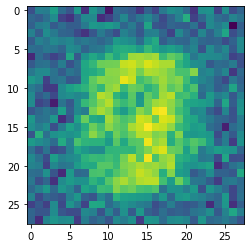

epochs... 601
epochs... 602
epochs... 603
epochs... 604
epochs... 605
epochs... 606
epochs... 607
epochs... 608
epochs... 609
epochs... 610
epochs... 611
epochs... 612
epochs... 613
epochs... 614
epochs... 615
epochs... 616
epochs... 617
epochs... 618
epochs... 619
epochs... 620
epochs... 621
epochs... 622
epochs... 623
epochs... 624
epochs... 625
epochs... 626
epochs... 627
epochs... 628
epochs... 629
epochs... 630
epochs... 631
epochs... 632
epochs... 633
epochs... 634
epochs... 635
epochs... 636
epochs... 637
epochs... 638
epochs... 639
epochs... 640
epochs... 641
epochs... 642
epochs... 643
epochs... 644
epochs... 645
epochs... 646
epochs... 647
epochs... 648
epochs... 649
epochs... 650
epochs... 651
epochs... 652
epochs... 653
epochs... 654
epochs... 655
epochs... 656
epochs... 657
epochs... 658
epochs... 659
epochs... 660
epochs... 661
epochs... 662
epochs... 663
epochs... 664
epochs... 665
epochs... 666
epochs... 667
epochs... 668
epochs... 669
epochs... 670
epochs... 671
epochs

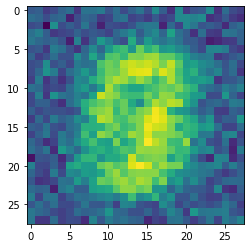

epochs... 701
epochs... 702
epochs... 703
epochs... 704
epochs... 705
epochs... 706
epochs... 707
epochs... 708
epochs... 709
epochs... 710
epochs... 711
epochs... 712
epochs... 713
epochs... 714
epochs... 715
epochs... 716
epochs... 717
epochs... 718
epochs... 719
epochs... 720
epochs... 721
epochs... 722
epochs... 723
epochs... 724
epochs... 725
epochs... 726
epochs... 727
epochs... 728
epochs... 729
epochs... 730
epochs... 731
epochs... 732
epochs... 733
epochs... 734
epochs... 735
epochs... 736
epochs... 737
epochs... 738
epochs... 739
epochs... 740
epochs... 741
epochs... 742
epochs... 743
epochs... 744
epochs... 745
epochs... 746
epochs... 747
epochs... 748
epochs... 749
epochs... 750
epochs... 751
epochs... 752
epochs... 753
epochs... 754
epochs... 755
epochs... 756
epochs... 757
epochs... 758
epochs... 759
epochs... 760
epochs... 761
epochs... 762
epochs... 763
epochs... 764
epochs... 765
epochs... 766
epochs... 767
epochs... 768
epochs... 769
epochs... 770
epochs... 771
epochs

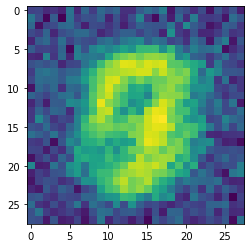

epochs... 801
epochs... 802
epochs... 803
epochs... 804
epochs... 805
epochs... 806
epochs... 807
epochs... 808
epochs... 809
epochs... 810
epochs... 811
epochs... 812
epochs... 813
epochs... 814
epochs... 815
epochs... 816
epochs... 817
epochs... 818
epochs... 819
epochs... 820
epochs... 821
epochs... 822
epochs... 823
epochs... 824
epochs... 825
epochs... 826
epochs... 827
epochs... 828
epochs... 829
epochs... 830
epochs... 831
epochs... 832
epochs... 833
epochs... 834
epochs... 835
epochs... 836
epochs... 837
epochs... 838
epochs... 839
epochs... 840
epochs... 841
epochs... 842
epochs... 843
epochs... 844
epochs... 845
epochs... 846
epochs... 847
epochs... 848
epochs... 849
epochs... 850
epochs... 851
epochs... 852
epochs... 853
epochs... 854
epochs... 855
epochs... 856
epochs... 857
epochs... 858
epochs... 859
epochs... 860
epochs... 861
epochs... 862
epochs... 863
epochs... 864
epochs... 865
epochs... 866
epochs... 867
epochs... 868
epochs... 869
epochs... 870
epochs... 871
epochs

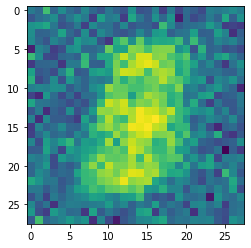

epochs... 901
epochs... 902
epochs... 903
epochs... 904
epochs... 905
epochs... 906
epochs... 907
epochs... 908
epochs... 909
epochs... 910
epochs... 911
epochs... 912
epochs... 913
epochs... 914
epochs... 915
epochs... 916
epochs... 917
epochs... 918
epochs... 919
epochs... 920
epochs... 921
epochs... 922
epochs... 923
epochs... 924
epochs... 925
epochs... 926
epochs... 927
epochs... 928
epochs... 929
epochs... 930
epochs... 931
epochs... 932
epochs... 933
epochs... 934
epochs... 935
epochs... 936
epochs... 937
epochs... 938
epochs... 939
epochs... 940
epochs... 941
epochs... 942
epochs... 943
epochs... 944
epochs... 945
epochs... 946
epochs... 947
epochs... 948
epochs... 949
epochs... 950
epochs... 951
epochs... 952
epochs... 953
epochs... 954
epochs... 955
epochs... 956
epochs... 957
epochs... 958
epochs... 959
epochs... 960
epochs... 961
epochs... 962
epochs... 963
epochs... 964
epochs... 965
epochs... 966
epochs... 967
epochs... 968
epochs... 969
epochs... 970
epochs... 971
epochs

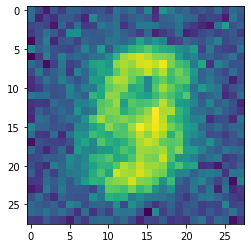

epochs... 1001
epochs... 1002
epochs... 1003
epochs... 1004
epochs... 1005
epochs... 1006
epochs... 1007
epochs... 1008
epochs... 1009
epochs... 1010
epochs... 1011
epochs... 1012
epochs... 1013
epochs... 1014
epochs... 1015
epochs... 1016
epochs... 1017
epochs... 1018
epochs... 1019
epochs... 1020
epochs... 1021
epochs... 1022
epochs... 1023
epochs... 1024
epochs... 1025
epochs... 1026
epochs... 1027
epochs... 1028
epochs... 1029
epochs... 1030
epochs... 1031
epochs... 1032
epochs... 1033
epochs... 1034
epochs... 1035
epochs... 1036
epochs... 1037
epochs... 1038
epochs... 1039
epochs... 1040
epochs... 1041
epochs... 1042
epochs... 1043
epochs... 1044
epochs... 1045
epochs... 1046
epochs... 1047
epochs... 1048
epochs... 1049
epochs... 1050
epochs... 1051
epochs... 1052
epochs... 1053
epochs... 1054
epochs... 1055
epochs... 1056
epochs... 1057
epochs... 1058
epochs... 1059
epochs... 1060
epochs... 1061
epochs... 1062
epochs... 1063
epochs... 1064
epochs... 1065
epochs... 1066
epochs... 

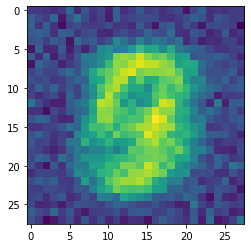

epochs... 1101
epochs... 1102
epochs... 1103
epochs... 1104
epochs... 1105
epochs... 1106
epochs... 1107
epochs... 1108
epochs... 1109
epochs... 1110
epochs... 1111
epochs... 1112
epochs... 1113
epochs... 1114
epochs... 1115
epochs... 1116
epochs... 1117
epochs... 1118
epochs... 1119
epochs... 1120
epochs... 1121
epochs... 1122
epochs... 1123
epochs... 1124
epochs... 1125
epochs... 1126
epochs... 1127
epochs... 1128
epochs... 1129
epochs... 1130
epochs... 1131
epochs... 1132
epochs... 1133
epochs... 1134
epochs... 1135
epochs... 1136
epochs... 1137
epochs... 1138
epochs... 1139
epochs... 1140
epochs... 1141
epochs... 1142
epochs... 1143
epochs... 1144
epochs... 1145
epochs... 1146
epochs... 1147
epochs... 1148
epochs... 1149
epochs... 1150
epochs... 1151
epochs... 1152
epochs... 1153
epochs... 1154
epochs... 1155
epochs... 1156
epochs... 1157
epochs... 1158
epochs... 1159
epochs... 1160
epochs... 1161
epochs... 1162
epochs... 1163
epochs... 1164
epochs... 1165
epochs... 1166
epochs... 

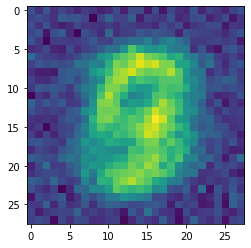

epochs... 1201
epochs... 1202
epochs... 1203
epochs... 1204
epochs... 1205
epochs... 1206
epochs... 1207
epochs... 1208
epochs... 1209
epochs... 1210
epochs... 1211
epochs... 1212
epochs... 1213
epochs... 1214
epochs... 1215
epochs... 1216
epochs... 1217
epochs... 1218
epochs... 1219
epochs... 1220
epochs... 1221
epochs... 1222
epochs... 1223
epochs... 1224
epochs... 1225
epochs... 1226
epochs... 1227
epochs... 1228
epochs... 1229
epochs... 1230
epochs... 1231
epochs... 1232
epochs... 1233
epochs... 1234
epochs... 1235
epochs... 1236
epochs... 1237
epochs... 1238
epochs... 1239
epochs... 1240
epochs... 1241
epochs... 1242
epochs... 1243
epochs... 1244
epochs... 1245
epochs... 1246
epochs... 1247
epochs... 1248
epochs... 1249
epochs... 1250
epochs... 1251
epochs... 1252
epochs... 1253
epochs... 1254
epochs... 1255
epochs... 1256
epochs... 1257
epochs... 1258
epochs... 1259
epochs... 1260
epochs... 1261
epochs... 1262
epochs... 1263
epochs... 1264
epochs... 1265
epochs... 1266
epochs... 

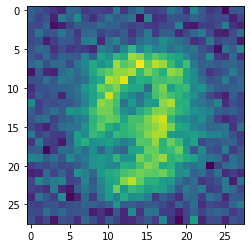

epochs... 1301
epochs... 1302
epochs... 1303
epochs... 1304
epochs... 1305
epochs... 1306
epochs... 1307
epochs... 1308
epochs... 1309
epochs... 1310
epochs... 1311
epochs... 1312
epochs... 1313
epochs... 1314
epochs... 1315
epochs... 1316
epochs... 1317
epochs... 1318
epochs... 1319
epochs... 1320
epochs... 1321
epochs... 1322
epochs... 1323
epochs... 1324
epochs... 1325
epochs... 1326
epochs... 1327
epochs... 1328
epochs... 1329
epochs... 1330
epochs... 1331
epochs... 1332
epochs... 1333
epochs... 1334
epochs... 1335
epochs... 1336
epochs... 1337
epochs... 1338
epochs... 1339
epochs... 1340
epochs... 1341
epochs... 1342
epochs... 1343
epochs... 1344
epochs... 1345
epochs... 1346
epochs... 1347
epochs... 1348
epochs... 1349
epochs... 1350
epochs... 1351
epochs... 1352
epochs... 1353
epochs... 1354
epochs... 1355
epochs... 1356
epochs... 1357
epochs... 1358
epochs... 1359
epochs... 1360
epochs... 1361
epochs... 1362
epochs... 1363
epochs... 1364
epochs... 1365
epochs... 1366
epochs... 

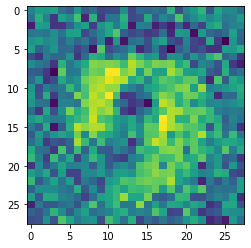

epochs... 1401
epochs... 1402
epochs... 1403
epochs... 1404
epochs... 1405
epochs... 1406
epochs... 1407
epochs... 1408
epochs... 1409
epochs... 1410
epochs... 1411
epochs... 1412
epochs... 1413
epochs... 1414
epochs... 1415
epochs... 1416
epochs... 1417
epochs... 1418
epochs... 1419
epochs... 1420
epochs... 1421
epochs... 1422
epochs... 1423
epochs... 1424
epochs... 1425
epochs... 1426
epochs... 1427
epochs... 1428
epochs... 1429
epochs... 1430
epochs... 1431
epochs... 1432
epochs... 1433
epochs... 1434
epochs... 1435
epochs... 1436
epochs... 1437
epochs... 1438
epochs... 1439
epochs... 1440
epochs... 1441
epochs... 1442
epochs... 1443
epochs... 1444
epochs... 1445
epochs... 1446
epochs... 1447
epochs... 1448
epochs... 1449
epochs... 1450
epochs... 1451
epochs... 1452
epochs... 1453
epochs... 1454
epochs... 1455
epochs... 1456
epochs... 1457
epochs... 1458
epochs... 1459
epochs... 1460
epochs... 1461
epochs... 1462
epochs... 1463
epochs... 1464
epochs... 1465
epochs... 1466
epochs... 

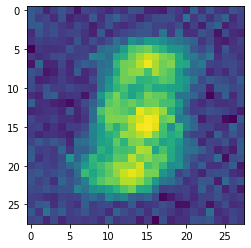

epochs... 1501
epochs... 1502
epochs... 1503
epochs... 1504
epochs... 1505
epochs... 1506
epochs... 1507
epochs... 1508
epochs... 1509
epochs... 1510
epochs... 1511
epochs... 1512
epochs... 1513
epochs... 1514
epochs... 1515
epochs... 1516
epochs... 1517
epochs... 1518
epochs... 1519
epochs... 1520
epochs... 1521
epochs... 1522
epochs... 1523
epochs... 1524
epochs... 1525
epochs... 1526
epochs... 1527
epochs... 1528
epochs... 1529
epochs... 1530
epochs... 1531
epochs... 1532
epochs... 1533
epochs... 1534
epochs... 1535
epochs... 1536
epochs... 1537
epochs... 1538
epochs... 1539
epochs... 1540
epochs... 1541
epochs... 1542
epochs... 1543
epochs... 1544
epochs... 1545
epochs... 1546
epochs... 1547
epochs... 1548
epochs... 1549
epochs... 1550
epochs... 1551
epochs... 1552
epochs... 1553
epochs... 1554
epochs... 1555
epochs... 1556
epochs... 1557
epochs... 1558
epochs... 1559
epochs... 1560
epochs... 1561
epochs... 1562
epochs... 1563
epochs... 1564
epochs... 1565
epochs... 1566
epochs... 

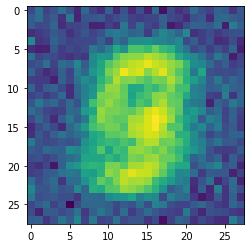

epochs... 1601
epochs... 1602
epochs... 1603
epochs... 1604
epochs... 1605
epochs... 1606
epochs... 1607
epochs... 1608
epochs... 1609
epochs... 1610
epochs... 1611
epochs... 1612
epochs... 1613
epochs... 1614
epochs... 1615
epochs... 1616
epochs... 1617
epochs... 1618
epochs... 1619
epochs... 1620
epochs... 1621
epochs... 1622
epochs... 1623
epochs... 1624
epochs... 1625
epochs... 1626
epochs... 1627
epochs... 1628
epochs... 1629
epochs... 1630
epochs... 1631
epochs... 1632
epochs... 1633
epochs... 1634
epochs... 1635
epochs... 1636
epochs... 1637
epochs... 1638
epochs... 1639
epochs... 1640
epochs... 1641
epochs... 1642
epochs... 1643
epochs... 1644
epochs... 1645
epochs... 1646
epochs... 1647
epochs... 1648
epochs... 1649
epochs... 1650
epochs... 1651
epochs... 1652
epochs... 1653
epochs... 1654
epochs... 1655
epochs... 1656
epochs... 1657
epochs... 1658
epochs... 1659
epochs... 1660
epochs... 1661
epochs... 1662
epochs... 1663
epochs... 1664
epochs... 1665
epochs... 1666
epochs... 

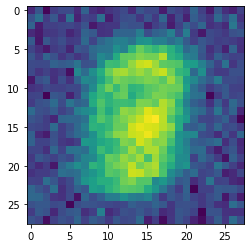

epochs... 1701
epochs... 1702
epochs... 1703
epochs... 1704
epochs... 1705
epochs... 1706
epochs... 1707
epochs... 1708
epochs... 1709
epochs... 1710
epochs... 1711
epochs... 1712
epochs... 1713
epochs... 1714
epochs... 1715
epochs... 1716
epochs... 1717
epochs... 1718
epochs... 1719
epochs... 1720
epochs... 1721
epochs... 1722
epochs... 1723
epochs... 1724
epochs... 1725
epochs... 1726
epochs... 1727
epochs... 1728
epochs... 1729
epochs... 1730
epochs... 1731
epochs... 1732
epochs... 1733
epochs... 1734
epochs... 1735
epochs... 1736
epochs... 1737
epochs... 1738
epochs... 1739
epochs... 1740
epochs... 1741
epochs... 1742
epochs... 1743
epochs... 1744
epochs... 1745
epochs... 1746
epochs... 1747
epochs... 1748
epochs... 1749
epochs... 1750
epochs... 1751
epochs... 1752
epochs... 1753
epochs... 1754
epochs... 1755
epochs... 1756
epochs... 1757
epochs... 1758
epochs... 1759
epochs... 1760
epochs... 1761
epochs... 1762
epochs... 1763
epochs... 1764
epochs... 1765
epochs... 1766
epochs... 

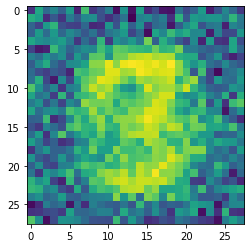

epochs... 1801
epochs... 1802
epochs... 1803
epochs... 1804
epochs... 1805
epochs... 1806
epochs... 1807
epochs... 1808
epochs... 1809
epochs... 1810
epochs... 1811
epochs... 1812
epochs... 1813
epochs... 1814
epochs... 1815
epochs... 1816
epochs... 1817
epochs... 1818
epochs... 1819
epochs... 1820
epochs... 1821
epochs... 1822
epochs... 1823
epochs... 1824
epochs... 1825
epochs... 1826
epochs... 1827
epochs... 1828
epochs... 1829
epochs... 1830
epochs... 1831
epochs... 1832
epochs... 1833
epochs... 1834
epochs... 1835
epochs... 1836
epochs... 1837
epochs... 1838
epochs... 1839
epochs... 1840
epochs... 1841
epochs... 1842
epochs... 1843
epochs... 1844
epochs... 1845
epochs... 1846
epochs... 1847
epochs... 1848
epochs... 1849
epochs... 1850
epochs... 1851
epochs... 1852
epochs... 1853
epochs... 1854
epochs... 1855
epochs... 1856
epochs... 1857
epochs... 1858
epochs... 1859
epochs... 1860
epochs... 1861
epochs... 1862
epochs... 1863
epochs... 1864
epochs... 1865
epochs... 1866
epochs... 

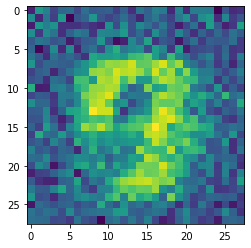

epochs... 1901
epochs... 1902
epochs... 1903
epochs... 1904
epochs... 1905
epochs... 1906
epochs... 1907
epochs... 1908
epochs... 1909
epochs... 1910
epochs... 1911
epochs... 1912
epochs... 1913
epochs... 1914
epochs... 1915
epochs... 1916
epochs... 1917
epochs... 1918
epochs... 1919
epochs... 1920
epochs... 1921
epochs... 1922
epochs... 1923
epochs... 1924
epochs... 1925
epochs... 1926
epochs... 1927
epochs... 1928
epochs... 1929
epochs... 1930
epochs... 1931
epochs... 1932
epochs... 1933
epochs... 1934
epochs... 1935
epochs... 1936
epochs... 1937
epochs... 1938
epochs... 1939
epochs... 1940
epochs... 1941
epochs... 1942
epochs... 1943
epochs... 1944
epochs... 1945
epochs... 1946
epochs... 1947
epochs... 1948
epochs... 1949
epochs... 1950
epochs... 1951
epochs... 1952
epochs... 1953
epochs... 1954
epochs... 1955
epochs... 1956
epochs... 1957
epochs... 1958
epochs... 1959
epochs... 1960
epochs... 1961
epochs... 1962
epochs... 1963
epochs... 1964
epochs... 1965
epochs... 1966
epochs... 

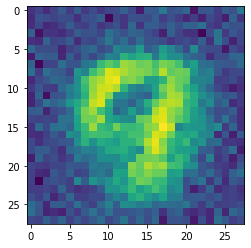

epochs... 2001
epochs... 2002
epochs... 2003
epochs... 2004
epochs... 2005
epochs... 2006
epochs... 2007
epochs... 2008
epochs... 2009
epochs... 2010
epochs... 2011
epochs... 2012
epochs... 2013
epochs... 2014
epochs... 2015
epochs... 2016
epochs... 2017
epochs... 2018
epochs... 2019
epochs... 2020
epochs... 2021
epochs... 2022
epochs... 2023
epochs... 2024
epochs... 2025
epochs... 2026
epochs... 2027
epochs... 2028
epochs... 2029
epochs... 2030
epochs... 2031
epochs... 2032
epochs... 2033
epochs... 2034
epochs... 2035
epochs... 2036
epochs... 2037
epochs... 2038
epochs... 2039
epochs... 2040
epochs... 2041
epochs... 2042
epochs... 2043
epochs... 2044
epochs... 2045
epochs... 2046
epochs... 2047
epochs... 2048
epochs... 2049
epochs... 2050
epochs... 2051
epochs... 2052
epochs... 2053
epochs... 2054
epochs... 2055
epochs... 2056
epochs... 2057
epochs... 2058
epochs... 2059
epochs... 2060
epochs... 2061
epochs... 2062
epochs... 2063
epochs... 2064
epochs... 2065
epochs... 2066
epochs... 

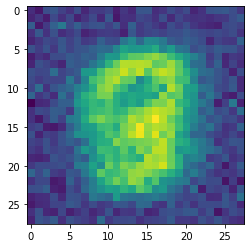

epochs... 2101
epochs... 2102
epochs... 2103
epochs... 2104
epochs... 2105
epochs... 2106
epochs... 2107
epochs... 2108
epochs... 2109
epochs... 2110
epochs... 2111
epochs... 2112
epochs... 2113
epochs... 2114
epochs... 2115
epochs... 2116
epochs... 2117
epochs... 2118
epochs... 2119
epochs... 2120
epochs... 2121
epochs... 2122
epochs... 2123
epochs... 2124
epochs... 2125
epochs... 2126
epochs... 2127
epochs... 2128
epochs... 2129
epochs... 2130
epochs... 2131
epochs... 2132
epochs... 2133
epochs... 2134
epochs... 2135
epochs... 2136
epochs... 2137
epochs... 2138
epochs... 2139
epochs... 2140
epochs... 2141
epochs... 2142
epochs... 2143
epochs... 2144
epochs... 2145
epochs... 2146
epochs... 2147
epochs... 2148
epochs... 2149
epochs... 2150
epochs... 2151
epochs... 2152
epochs... 2153
epochs... 2154
epochs... 2155
epochs... 2156
epochs... 2157
epochs... 2158
epochs... 2159
epochs... 2160
epochs... 2161
epochs... 2162
epochs... 2163
epochs... 2164
epochs... 2165
epochs... 2166
epochs... 

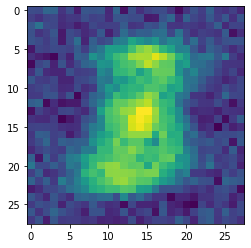

epochs... 2201
epochs... 2202
epochs... 2203
epochs... 2204
epochs... 2205
epochs... 2206
epochs... 2207
epochs... 2208
epochs... 2209
epochs... 2210
epochs... 2211
epochs... 2212
epochs... 2213
epochs... 2214
epochs... 2215
epochs... 2216
epochs... 2217
epochs... 2218
epochs... 2219
epochs... 2220
epochs... 2221
epochs... 2222
epochs... 2223
epochs... 2224
epochs... 2225
epochs... 2226
epochs... 2227
epochs... 2228
epochs... 2229
epochs... 2230
epochs... 2231
epochs... 2232
epochs... 2233
epochs... 2234
epochs... 2235
epochs... 2236
epochs... 2237
epochs... 2238
epochs... 2239
epochs... 2240
epochs... 2241
epochs... 2242
epochs... 2243
epochs... 2244
epochs... 2245
epochs... 2246
epochs... 2247
epochs... 2248
epochs... 2249
epochs... 2250
epochs... 2251
epochs... 2252
epochs... 2253
epochs... 2254
epochs... 2255
epochs... 2256
epochs... 2257
epochs... 2258
epochs... 2259
epochs... 2260
epochs... 2261
epochs... 2262
epochs... 2263
epochs... 2264
epochs... 2265
epochs... 2266
epochs... 

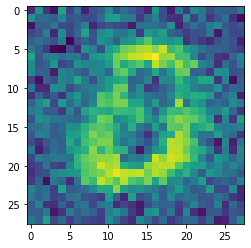

epochs... 2301
epochs... 2302
epochs... 2303
epochs... 2304
epochs... 2305
epochs... 2306
epochs... 2307
epochs... 2308
epochs... 2309
epochs... 2310
epochs... 2311
epochs... 2312
epochs... 2313
epochs... 2314
epochs... 2315
epochs... 2316
epochs... 2317
epochs... 2318
epochs... 2319
epochs... 2320
epochs... 2321
epochs... 2322
epochs... 2323
epochs... 2324
epochs... 2325
epochs... 2326
epochs... 2327
epochs... 2328
epochs... 2329
epochs... 2330
epochs... 2331
epochs... 2332
epochs... 2333
epochs... 2334
epochs... 2335
epochs... 2336
epochs... 2337
epochs... 2338
epochs... 2339
epochs... 2340
epochs... 2341
epochs... 2342
epochs... 2343
epochs... 2344
epochs... 2345
epochs... 2346
epochs... 2347
epochs... 2348
epochs... 2349
epochs... 2350
epochs... 2351
epochs... 2352
epochs... 2353
epochs... 2354
epochs... 2355
epochs... 2356
epochs... 2357
epochs... 2358
epochs... 2359
epochs... 2360
epochs... 2361
epochs... 2362
epochs... 2363
epochs... 2364
epochs... 2365
epochs... 2366
epochs... 

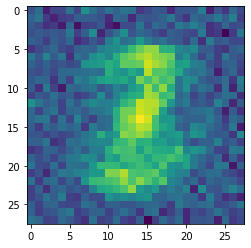

epochs... 2401
epochs... 2402
epochs... 2403
epochs... 2404
epochs... 2405
epochs... 2406
epochs... 2407
epochs... 2408
epochs... 2409
epochs... 2410
epochs... 2411
epochs... 2412
epochs... 2413
epochs... 2414
epochs... 2415
epochs... 2416
epochs... 2417
epochs... 2418
epochs... 2419
epochs... 2420
epochs... 2421
epochs... 2422
epochs... 2423
epochs... 2424
epochs... 2425
epochs... 2426
epochs... 2427
epochs... 2428
epochs... 2429
epochs... 2430
epochs... 2431
epochs... 2432
epochs... 2433
epochs... 2434
epochs... 2435
epochs... 2436
epochs... 2437
epochs... 2438
epochs... 2439
epochs... 2440
epochs... 2441
epochs... 2442
epochs... 2443
epochs... 2444
epochs... 2445
epochs... 2446
epochs... 2447
epochs... 2448
epochs... 2449
epochs... 2450
epochs... 2451
epochs... 2452
epochs... 2453
epochs... 2454
epochs... 2455
epochs... 2456
epochs... 2457
epochs... 2458
epochs... 2459
epochs... 2460
epochs... 2461
epochs... 2462
epochs... 2463
epochs... 2464
epochs... 2465
epochs... 2466
epochs... 

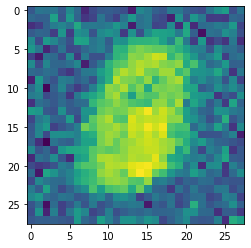

epochs... 2501
epochs... 2502
epochs... 2503
epochs... 2504
epochs... 2505
epochs... 2506
epochs... 2507
epochs... 2508
epochs... 2509
epochs... 2510
epochs... 2511
epochs... 2512
epochs... 2513
epochs... 2514
epochs... 2515
epochs... 2516
epochs... 2517
epochs... 2518
epochs... 2519
epochs... 2520
epochs... 2521
epochs... 2522
epochs... 2523
epochs... 2524
epochs... 2525
epochs... 2526
epochs... 2527
epochs... 2528
epochs... 2529
epochs... 2530
epochs... 2531
epochs... 2532
epochs... 2533
epochs... 2534
epochs... 2535
epochs... 2536
epochs... 2537
epochs... 2538
epochs... 2539
epochs... 2540
epochs... 2541
epochs... 2542
epochs... 2543
epochs... 2544
epochs... 2545
epochs... 2546
epochs... 2547
epochs... 2548
epochs... 2549
epochs... 2550
epochs... 2551
epochs... 2552
epochs... 2553
epochs... 2554
epochs... 2555
epochs... 2556
epochs... 2557
epochs... 2558
epochs... 2559
epochs... 2560
epochs... 2561
epochs... 2562
epochs... 2563
epochs... 2564
epochs... 2565
epochs... 2566
epochs... 

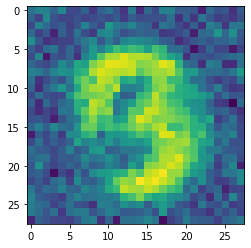

epochs... 2601
epochs... 2602
epochs... 2603
epochs... 2604
epochs... 2605
epochs... 2606
epochs... 2607
epochs... 2608
epochs... 2609
epochs... 2610
epochs... 2611
epochs... 2612
epochs... 2613
epochs... 2614
epochs... 2615
epochs... 2616
epochs... 2617
epochs... 2618
epochs... 2619
epochs... 2620
epochs... 2621
epochs... 2622
epochs... 2623
epochs... 2624
epochs... 2625
epochs... 2626
epochs... 2627
epochs... 2628
epochs... 2629
epochs... 2630
epochs... 2631
epochs... 2632
epochs... 2633
epochs... 2634
epochs... 2635
epochs... 2636
epochs... 2637
epochs... 2638
epochs... 2639
epochs... 2640
epochs... 2641
epochs... 2642
epochs... 2643
epochs... 2644
epochs... 2645
epochs... 2646
epochs... 2647
epochs... 2648
epochs... 2649
epochs... 2650
epochs... 2651
epochs... 2652
epochs... 2653
epochs... 2654
epochs... 2655
epochs... 2656
epochs... 2657
epochs... 2658
epochs... 2659
epochs... 2660
epochs... 2661
epochs... 2662
epochs... 2663
epochs... 2664
epochs... 2665
epochs... 2666
epochs... 

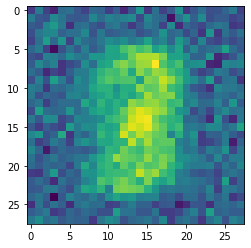

epochs... 2701
epochs... 2702
epochs... 2703
epochs... 2704
epochs... 2705
epochs... 2706
epochs... 2707
epochs... 2708
epochs... 2709
epochs... 2710
epochs... 2711
epochs... 2712
epochs... 2713
epochs... 2714
epochs... 2715
epochs... 2716
epochs... 2717
epochs... 2718
epochs... 2719
epochs... 2720
epochs... 2721
epochs... 2722
epochs... 2723
epochs... 2724
epochs... 2725
epochs... 2726
epochs... 2727
epochs... 2728
epochs... 2729
epochs... 2730
epochs... 2731
epochs... 2732
epochs... 2733
epochs... 2734
epochs... 2735
epochs... 2736
epochs... 2737
epochs... 2738
epochs... 2739
epochs... 2740
epochs... 2741
epochs... 2742
epochs... 2743
epochs... 2744
epochs... 2745
epochs... 2746
epochs... 2747
epochs... 2748
epochs... 2749
epochs... 2750
epochs... 2751
epochs... 2752
epochs... 2753
epochs... 2754
epochs... 2755
epochs... 2756
epochs... 2757
epochs... 2758
epochs... 2759
epochs... 2760
epochs... 2761
epochs... 2762
epochs... 2763
epochs... 2764
epochs... 2765
epochs... 2766
epochs... 

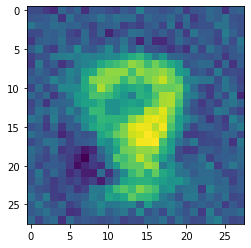

epochs... 2801
epochs... 2802
epochs... 2803
epochs... 2804
epochs... 2805
epochs... 2806
epochs... 2807
epochs... 2808
epochs... 2809
epochs... 2810
epochs... 2811
epochs... 2812
epochs... 2813
epochs... 2814
epochs... 2815
epochs... 2816
epochs... 2817
epochs... 2818
epochs... 2819
epochs... 2820
epochs... 2821
epochs... 2822
epochs... 2823
epochs... 2824
epochs... 2825
epochs... 2826
epochs... 2827
epochs... 2828
epochs... 2829
epochs... 2830
epochs... 2831
epochs... 2832
epochs... 2833
epochs... 2834
epochs... 2835
epochs... 2836
epochs... 2837
epochs... 2838
epochs... 2839
epochs... 2840
epochs... 2841
epochs... 2842
epochs... 2843
epochs... 2844
epochs... 2845
epochs... 2846
epochs... 2847
epochs... 2848
epochs... 2849
epochs... 2850
epochs... 2851
epochs... 2852
epochs... 2853
epochs... 2854
epochs... 2855
epochs... 2856
epochs... 2857
epochs... 2858
epochs... 2859
epochs... 2860
epochs... 2861
epochs... 2862
epochs... 2863
epochs... 2864
epochs... 2865
epochs... 2866
epochs... 

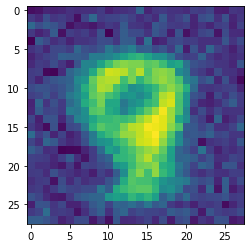

epochs... 2901
epochs... 2902
epochs... 2903
epochs... 2904
epochs... 2905
epochs... 2906
epochs... 2907
epochs... 2908
epochs... 2909
epochs... 2910
epochs... 2911
epochs... 2912
epochs... 2913
epochs... 2914
epochs... 2915
epochs... 2916
epochs... 2917
epochs... 2918
epochs... 2919
epochs... 2920
epochs... 2921
epochs... 2922
epochs... 2923
epochs... 2924
epochs... 2925
epochs... 2926
epochs... 2927
epochs... 2928
epochs... 2929
epochs... 2930
epochs... 2931
epochs... 2932
epochs... 2933
epochs... 2934
epochs... 2935
epochs... 2936
epochs... 2937
epochs... 2938
epochs... 2939
epochs... 2940
epochs... 2941
epochs... 2942
epochs... 2943
epochs... 2944
epochs... 2945
epochs... 2946
epochs... 2947
epochs... 2948
epochs... 2949
epochs... 2950
epochs... 2951
epochs... 2952
epochs... 2953
epochs... 2954
epochs... 2955
epochs... 2956
epochs... 2957
epochs... 2958
epochs... 2959
epochs... 2960
epochs... 2961
epochs... 2962
epochs... 2963
epochs... 2964
epochs... 2965
epochs... 2966
epochs... 

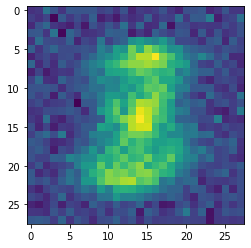

epochs... 3001
epochs... 3002
epochs... 3003
epochs... 3004
epochs... 3005
epochs... 3006
epochs... 3007
epochs... 3008
epochs... 3009
epochs... 3010
epochs... 3011
epochs... 3012
epochs... 3013
epochs... 3014
epochs... 3015
epochs... 3016
epochs... 3017
epochs... 3018
epochs... 3019
epochs... 3020
epochs... 3021
epochs... 3022
epochs... 3023
epochs... 3024
epochs... 3025
epochs... 3026
epochs... 3027
epochs... 3028
epochs... 3029
epochs... 3030
epochs... 3031
epochs... 3032
epochs... 3033
epochs... 3034
epochs... 3035
epochs... 3036
epochs... 3037
epochs... 3038
epochs... 3039
epochs... 3040
epochs... 3041
epochs... 3042
epochs... 3043
epochs... 3044
epochs... 3045
epochs... 3046
epochs... 3047
epochs... 3048
epochs... 3049
epochs... 3050
epochs... 3051
epochs... 3052
epochs... 3053
epochs... 3054
epochs... 3055
epochs... 3056
epochs... 3057
epochs... 3058
epochs... 3059
epochs... 3060
epochs... 3061
epochs... 3062
epochs... 3063
epochs... 3064
epochs... 3065
epochs... 3066
epochs... 

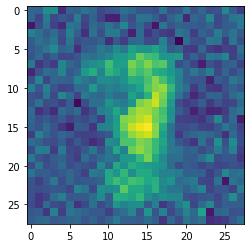

epochs... 3101
epochs... 3102
epochs... 3103
epochs... 3104
epochs... 3105
epochs... 3106
epochs... 3107
epochs... 3108
epochs... 3109
epochs... 3110
epochs... 3111
epochs... 3112
epochs... 3113
epochs... 3114
epochs... 3115
epochs... 3116
epochs... 3117
epochs... 3118
epochs... 3119
epochs... 3120
epochs... 3121
epochs... 3122
epochs... 3123
epochs... 3124
epochs... 3125
epochs... 3126
epochs... 3127
epochs... 3128
epochs... 3129
epochs... 3130
epochs... 3131
epochs... 3132
epochs... 3133
epochs... 3134
epochs... 3135
epochs... 3136
epochs... 3137
epochs... 3138
epochs... 3139
epochs... 3140
epochs... 3141
epochs... 3142
epochs... 3143
epochs... 3144
epochs... 3145
epochs... 3146
epochs... 3147
epochs... 3148
epochs... 3149
epochs... 3150
epochs... 3151
epochs... 3152
epochs... 3153
epochs... 3154
epochs... 3155
epochs... 3156
epochs... 3157
epochs... 3158
epochs... 3159
epochs... 3160
epochs... 3161
epochs... 3162
epochs... 3163
epochs... 3164
epochs... 3165
epochs... 3166
epochs... 

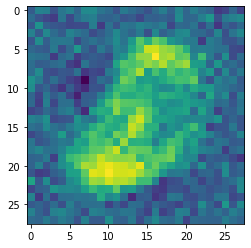

epochs... 3201
epochs... 3202
epochs... 3203
epochs... 3204
epochs... 3205
epochs... 3206
epochs... 3207
epochs... 3208
epochs... 3209
epochs... 3210
epochs... 3211
epochs... 3212
epochs... 3213
epochs... 3214
epochs... 3215
epochs... 3216
epochs... 3217
epochs... 3218
epochs... 3219
epochs... 3220
epochs... 3221
epochs... 3222
epochs... 3223
epochs... 3224
epochs... 3225
epochs... 3226
epochs... 3227
epochs... 3228
epochs... 3229
epochs... 3230
epochs... 3231
epochs... 3232
epochs... 3233
epochs... 3234
epochs... 3235
epochs... 3236
epochs... 3237
epochs... 3238
epochs... 3239
epochs... 3240
epochs... 3241
epochs... 3242
epochs... 3243
epochs... 3244
epochs... 3245
epochs... 3246
epochs... 3247
epochs... 3248
epochs... 3249
epochs... 3250
epochs... 3251
epochs... 3252
epochs... 3253
epochs... 3254
epochs... 3255
epochs... 3256
epochs... 3257
epochs... 3258
epochs... 3259
epochs... 3260
epochs... 3261
epochs... 3262
epochs... 3263
epochs... 3264
epochs... 3265
epochs... 3266
epochs... 

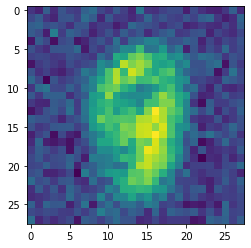

epochs... 3301
epochs... 3302
epochs... 3303
epochs... 3304
epochs... 3305
epochs... 3306
epochs... 3307
epochs... 3308
epochs... 3309
epochs... 3310
epochs... 3311
epochs... 3312
epochs... 3313
epochs... 3314
epochs... 3315
epochs... 3316
epochs... 3317
epochs... 3318
epochs... 3319
epochs... 3320
epochs... 3321
epochs... 3322
epochs... 3323
epochs... 3324
epochs... 3325
epochs... 3326
epochs... 3327
epochs... 3328
epochs... 3329
epochs... 3330
epochs... 3331
epochs... 3332
epochs... 3333
epochs... 3334
epochs... 3335
epochs... 3336
epochs... 3337
epochs... 3338
epochs... 3339
epochs... 3340
epochs... 3341
epochs... 3342
epochs... 3343
epochs... 3344
epochs... 3345
epochs... 3346
epochs... 3347
epochs... 3348
epochs... 3349
epochs... 3350
epochs... 3351
epochs... 3352
epochs... 3353
epochs... 3354
epochs... 3355
epochs... 3356
epochs... 3357
epochs... 3358
epochs... 3359
epochs... 3360
epochs... 3361
epochs... 3362
epochs... 3363
epochs... 3364
epochs... 3365
epochs... 3366
epochs... 

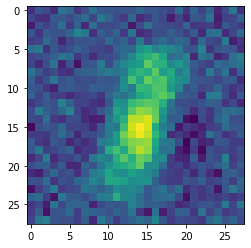

epochs... 3401
epochs... 3402
epochs... 3403
epochs... 3404
epochs... 3405
epochs... 3406
epochs... 3407
epochs... 3408
epochs... 3409
epochs... 3410
epochs... 3411
epochs... 3412
epochs... 3413
epochs... 3414
epochs... 3415
epochs... 3416
epochs... 3417
epochs... 3418
epochs... 3419
epochs... 3420
epochs... 3421
epochs... 3422
epochs... 3423
epochs... 3424
epochs... 3425
epochs... 3426
epochs... 3427
epochs... 3428
epochs... 3429
epochs... 3430
epochs... 3431
epochs... 3432
epochs... 3433
epochs... 3434
epochs... 3435
epochs... 3436
epochs... 3437
epochs... 3438
epochs... 3439
epochs... 3440
epochs... 3441
epochs... 3442
epochs... 3443
epochs... 3444
epochs... 3445
epochs... 3446
epochs... 3447
epochs... 3448
epochs... 3449
epochs... 3450
epochs... 3451
epochs... 3452
epochs... 3453
epochs... 3454
epochs... 3455
epochs... 3456
epochs... 3457
epochs... 3458
epochs... 3459
epochs... 3460
epochs... 3461
epochs... 3462
epochs... 3463
epochs... 3464
epochs... 3465
epochs... 3466
epochs... 

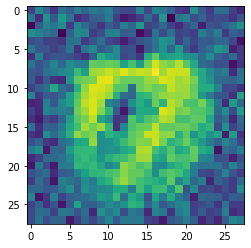

epochs... 3501
epochs... 3502
epochs... 3503
epochs... 3504
epochs... 3505
epochs... 3506
epochs... 3507
epochs... 3508
epochs... 3509
epochs... 3510
epochs... 3511
epochs... 3512
epochs... 3513
epochs... 3514
epochs... 3515
epochs... 3516
epochs... 3517
epochs... 3518
epochs... 3519
epochs... 3520
epochs... 3521
epochs... 3522
epochs... 3523
epochs... 3524
epochs... 3525
epochs... 3526
epochs... 3527
epochs... 3528
epochs... 3529
epochs... 3530
epochs... 3531
epochs... 3532
epochs... 3533
epochs... 3534
epochs... 3535
epochs... 3536
epochs... 3537
epochs... 3538
epochs... 3539
epochs... 3540
epochs... 3541
epochs... 3542
epochs... 3543
epochs... 3544
epochs... 3545
epochs... 3546
epochs... 3547
epochs... 3548
epochs... 3549
epochs... 3550
epochs... 3551
epochs... 3552
epochs... 3553
epochs... 3554
epochs... 3555
epochs... 3556
epochs... 3557
epochs... 3558
epochs... 3559
epochs... 3560
epochs... 3561
epochs... 3562
epochs... 3563
epochs... 3564
epochs... 3565
epochs... 3566
epochs... 

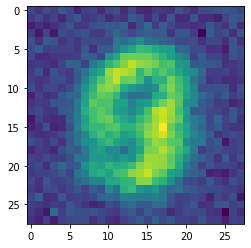

epochs... 3601
epochs... 3602
epochs... 3603
epochs... 3604
epochs... 3605
epochs... 3606
epochs... 3607
epochs... 3608
epochs... 3609
epochs... 3610
epochs... 3611
epochs... 3612
epochs... 3613
epochs... 3614
epochs... 3615
epochs... 3616
epochs... 3617
epochs... 3618
epochs... 3619
epochs... 3620
epochs... 3621
epochs... 3622
epochs... 3623
epochs... 3624
epochs... 3625
epochs... 3626
epochs... 3627
epochs... 3628
epochs... 3629
epochs... 3630
epochs... 3631
epochs... 3632
epochs... 3633
epochs... 3634
epochs... 3635
epochs... 3636
epochs... 3637
epochs... 3638
epochs... 3639
epochs... 3640
epochs... 3641
epochs... 3642
epochs... 3643
epochs... 3644
epochs... 3645
epochs... 3646
epochs... 3647
epochs... 3648
epochs... 3649
epochs... 3650
epochs... 3651
epochs... 3652
epochs... 3653
epochs... 3654
epochs... 3655
epochs... 3656
epochs... 3657
epochs... 3658
epochs... 3659
epochs... 3660
epochs... 3661
epochs... 3662
epochs... 3663
epochs... 3664
epochs... 3665
epochs... 3666
epochs... 

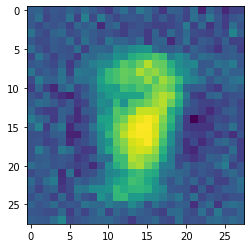

epochs... 3701
epochs... 3702
epochs... 3703
epochs... 3704
epochs... 3705
epochs... 3706
epochs... 3707
epochs... 3708
epochs... 3709
epochs... 3710
epochs... 3711
epochs... 3712
epochs... 3713
epochs... 3714
epochs... 3715
epochs... 3716
epochs... 3717
epochs... 3718
epochs... 3719
epochs... 3720
epochs... 3721
epochs... 3722
epochs... 3723
epochs... 3724
epochs... 3725
epochs... 3726
epochs... 3727
epochs... 3728
epochs... 3729
epochs... 3730
epochs... 3731
epochs... 3732
epochs... 3733
epochs... 3734
epochs... 3735
epochs... 3736
epochs... 3737
epochs... 3738
epochs... 3739
epochs... 3740
epochs... 3741
epochs... 3742
epochs... 3743
epochs... 3744
epochs... 3745
epochs... 3746
epochs... 3747
epochs... 3748
epochs... 3749
epochs... 3750
epochs... 3751
epochs... 3752
epochs... 3753
epochs... 3754
epochs... 3755
epochs... 3756
epochs... 3757
epochs... 3758
epochs... 3759
epochs... 3760
epochs... 3761
epochs... 3762
epochs... 3763
epochs... 3764
epochs... 3765
epochs... 3766
epochs... 

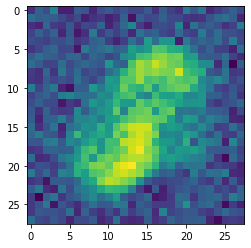

epochs... 3801
epochs... 3802
epochs... 3803
epochs... 3804
epochs... 3805
epochs... 3806
epochs... 3807
epochs... 3808
epochs... 3809
epochs... 3810
epochs... 3811
epochs... 3812
epochs... 3813
epochs... 3814
epochs... 3815
epochs... 3816
epochs... 3817
epochs... 3818
epochs... 3819
epochs... 3820
epochs... 3821
epochs... 3822
epochs... 3823
epochs... 3824
epochs... 3825
epochs... 3826
epochs... 3827
epochs... 3828
epochs... 3829
epochs... 3830
epochs... 3831
epochs... 3832
epochs... 3833
epochs... 3834
epochs... 3835
epochs... 3836
epochs... 3837
epochs... 3838
epochs... 3839
epochs... 3840
epochs... 3841
epochs... 3842
epochs... 3843
epochs... 3844
epochs... 3845
epochs... 3846
epochs... 3847
epochs... 3848
epochs... 3849
epochs... 3850
epochs... 3851
epochs... 3852
epochs... 3853
epochs... 3854
epochs... 3855
epochs... 3856
epochs... 3857
epochs... 3858
epochs... 3859
epochs... 3860
epochs... 3861
epochs... 3862
epochs... 3863
epochs... 3864
epochs... 3865
epochs... 3866
epochs... 

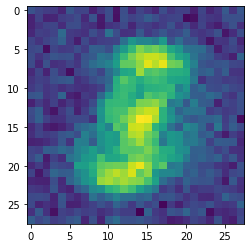

epochs... 3901
epochs... 3902
epochs... 3903
epochs... 3904
epochs... 3905
epochs... 3906
epochs... 3907
epochs... 3908
epochs... 3909
epochs... 3910
epochs... 3911
epochs... 3912
epochs... 3913
epochs... 3914
epochs... 3915
epochs... 3916
epochs... 3917
epochs... 3918
epochs... 3919
epochs... 3920
epochs... 3921
epochs... 3922
epochs... 3923
epochs... 3924
epochs... 3925
epochs... 3926
epochs... 3927
epochs... 3928
epochs... 3929
epochs... 3930
epochs... 3931
epochs... 3932
epochs... 3933
epochs... 3934
epochs... 3935
epochs... 3936
epochs... 3937
epochs... 3938
epochs... 3939
epochs... 3940
epochs... 3941
epochs... 3942
epochs... 3943
epochs... 3944
epochs... 3945
epochs... 3946
epochs... 3947
epochs... 3948
epochs... 3949
epochs... 3950
epochs... 3951
epochs... 3952
epochs... 3953
epochs... 3954
epochs... 3955
epochs... 3956
epochs... 3957
epochs... 3958
epochs... 3959
epochs... 3960
epochs... 3961
epochs... 3962
epochs... 3963
epochs... 3964
epochs... 3965
epochs... 3966
epochs... 

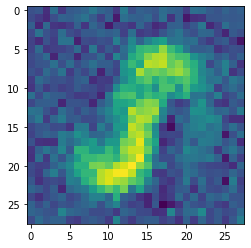

epochs... 4001
epochs... 4002
epochs... 4003
epochs... 4004
epochs... 4005
epochs... 4006
epochs... 4007
epochs... 4008
epochs... 4009
epochs... 4010
epochs... 4011
epochs... 4012
epochs... 4013
epochs... 4014
epochs... 4015
epochs... 4016
epochs... 4017
epochs... 4018
epochs... 4019
epochs... 4020
epochs... 4021
epochs... 4022
epochs... 4023
epochs... 4024
epochs... 4025
epochs... 4026
epochs... 4027
epochs... 4028
epochs... 4029
epochs... 4030
epochs... 4031
epochs... 4032
epochs... 4033
epochs... 4034
epochs... 4035
epochs... 4036
epochs... 4037
epochs... 4038
epochs... 4039
epochs... 4040
epochs... 4041
epochs... 4042
epochs... 4043
epochs... 4044
epochs... 4045
epochs... 4046
epochs... 4047
epochs... 4048
epochs... 4049
epochs... 4050
epochs... 4051
epochs... 4052
epochs... 4053
epochs... 4054
epochs... 4055
epochs... 4056
epochs... 4057
epochs... 4058
epochs... 4059
epochs... 4060
epochs... 4061
epochs... 4062
epochs... 4063
epochs... 4064
epochs... 4065
epochs... 4066
epochs... 

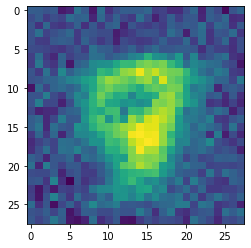

epochs... 4101
epochs... 4102
epochs... 4103
epochs... 4104
epochs... 4105
epochs... 4106
epochs... 4107
epochs... 4108
epochs... 4109
epochs... 4110
epochs... 4111
epochs... 4112
epochs... 4113
epochs... 4114
epochs... 4115
epochs... 4116
epochs... 4117
epochs... 4118
epochs... 4119
epochs... 4120
epochs... 4121
epochs... 4122
epochs... 4123
epochs... 4124
epochs... 4125
epochs... 4126
epochs... 4127
epochs... 4128
epochs... 4129
epochs... 4130
epochs... 4131
epochs... 4132
epochs... 4133
epochs... 4134
epochs... 4135
epochs... 4136
epochs... 4137
epochs... 4138
epochs... 4139
epochs... 4140
epochs... 4141
epochs... 4142
epochs... 4143
epochs... 4144
epochs... 4145
epochs... 4146
epochs... 4147
epochs... 4148
epochs... 4149
epochs... 4150
epochs... 4151
epochs... 4152
epochs... 4153
epochs... 4154
epochs... 4155
epochs... 4156
epochs... 4157
epochs... 4158
epochs... 4159
epochs... 4160
epochs... 4161
epochs... 4162
epochs... 4163
epochs... 4164
epochs... 4165
epochs... 4166
epochs... 

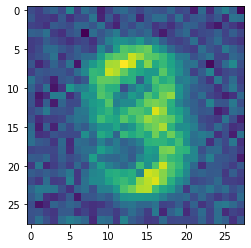

epochs... 4201
epochs... 4202
epochs... 4203
epochs... 4204
epochs... 4205
epochs... 4206
epochs... 4207
epochs... 4208
epochs... 4209
epochs... 4210
epochs... 4211
epochs... 4212
epochs... 4213
epochs... 4214
epochs... 4215
epochs... 4216
epochs... 4217
epochs... 4218
epochs... 4219
epochs... 4220
epochs... 4221
epochs... 4222
epochs... 4223
epochs... 4224
epochs... 4225
epochs... 4226
epochs... 4227
epochs... 4228
epochs... 4229
epochs... 4230
epochs... 4231
epochs... 4232
epochs... 4233
epochs... 4234
epochs... 4235
epochs... 4236
epochs... 4237
epochs... 4238
epochs... 4239
epochs... 4240
epochs... 4241
epochs... 4242
epochs... 4243
epochs... 4244
epochs... 4245
epochs... 4246
epochs... 4247
epochs... 4248
epochs... 4249
epochs... 4250
epochs... 4251
epochs... 4252
epochs... 4253
epochs... 4254
epochs... 4255
epochs... 4256
epochs... 4257
epochs... 4258
epochs... 4259
epochs... 4260
epochs... 4261
epochs... 4262
epochs... 4263
epochs... 4264
epochs... 4265
epochs... 4266
epochs... 

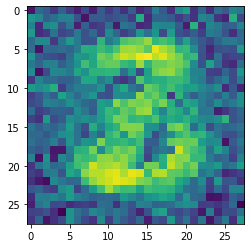

epochs... 4301
epochs... 4302
epochs... 4303
epochs... 4304
epochs... 4305
epochs... 4306
epochs... 4307
epochs... 4308
epochs... 4309
epochs... 4310
epochs... 4311
epochs... 4312
epochs... 4313
epochs... 4314
epochs... 4315
epochs... 4316
epochs... 4317
epochs... 4318
epochs... 4319
epochs... 4320
epochs... 4321
epochs... 4322
epochs... 4323
epochs... 4324
epochs... 4325
epochs... 4326
epochs... 4327
epochs... 4328
epochs... 4329
epochs... 4330
epochs... 4331
epochs... 4332
epochs... 4333
epochs... 4334
epochs... 4335
epochs... 4336
epochs... 4337
epochs... 4338
epochs... 4339
epochs... 4340
epochs... 4341
epochs... 4342
epochs... 4343
epochs... 4344
epochs... 4345
epochs... 4346
epochs... 4347
epochs... 4348
epochs... 4349
epochs... 4350
epochs... 4351
epochs... 4352
epochs... 4353
epochs... 4354
epochs... 4355
epochs... 4356
epochs... 4357
epochs... 4358
epochs... 4359
epochs... 4360
epochs... 4361
epochs... 4362
epochs... 4363
epochs... 4364
epochs... 4365
epochs... 4366
epochs... 

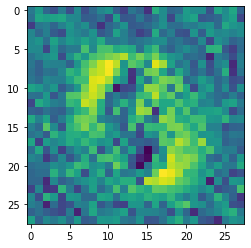

epochs... 4401
epochs... 4402
epochs... 4403
epochs... 4404
epochs... 4405
epochs... 4406
epochs... 4407
epochs... 4408
epochs... 4409
epochs... 4410
epochs... 4411
epochs... 4412
epochs... 4413
epochs... 4414
epochs... 4415
epochs... 4416
epochs... 4417
epochs... 4418
epochs... 4419
epochs... 4420
epochs... 4421
epochs... 4422
epochs... 4423
epochs... 4424
epochs... 4425
epochs... 4426
epochs... 4427
epochs... 4428
epochs... 4429
epochs... 4430
epochs... 4431
epochs... 4432
epochs... 4433
epochs... 4434
epochs... 4435
epochs... 4436
epochs... 4437
epochs... 4438
epochs... 4439
epochs... 4440
epochs... 4441
epochs... 4442
epochs... 4443
epochs... 4444
epochs... 4445
epochs... 4446
epochs... 4447
epochs... 4448
epochs... 4449
epochs... 4450
epochs... 4451
epochs... 4452
epochs... 4453
epochs... 4454
epochs... 4455
epochs... 4456
epochs... 4457
epochs... 4458
epochs... 4459
epochs... 4460
epochs... 4461
epochs... 4462
epochs... 4463
epochs... 4464
epochs... 4465
epochs... 4466
epochs... 

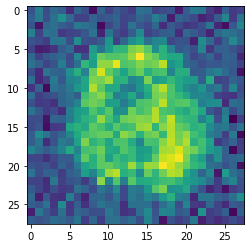

epochs... 4501
epochs... 4502
epochs... 4503
epochs... 4504
epochs... 4505
epochs... 4506
epochs... 4507
epochs... 4508
epochs... 4509
epochs... 4510
epochs... 4511
epochs... 4512
epochs... 4513
epochs... 4514
epochs... 4515
epochs... 4516
epochs... 4517
epochs... 4518
epochs... 4519
epochs... 4520
epochs... 4521
epochs... 4522
epochs... 4523
epochs... 4524
epochs... 4525
epochs... 4526
epochs... 4527
epochs... 4528
epochs... 4529
epochs... 4530
epochs... 4531
epochs... 4532
epochs... 4533
epochs... 4534
epochs... 4535
epochs... 4536
epochs... 4537
epochs... 4538
epochs... 4539
epochs... 4540
epochs... 4541
epochs... 4542
epochs... 4543
epochs... 4544
epochs... 4545
epochs... 4546
epochs... 4547
epochs... 4548
epochs... 4549
epochs... 4550
epochs... 4551
epochs... 4552
epochs... 4553
epochs... 4554
epochs... 4555
epochs... 4556
epochs... 4557
epochs... 4558
epochs... 4559
epochs... 4560
epochs... 4561
epochs... 4562
epochs... 4563
epochs... 4564
epochs... 4565
epochs... 4566
epochs... 

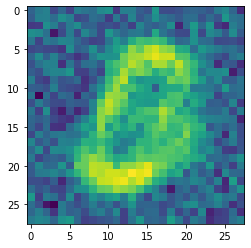

epochs... 4601
epochs... 4602
epochs... 4603
epochs... 4604
epochs... 4605
epochs... 4606
epochs... 4607
epochs... 4608
epochs... 4609
epochs... 4610
epochs... 4611
epochs... 4612
epochs... 4613
epochs... 4614
epochs... 4615
epochs... 4616
epochs... 4617
epochs... 4618
epochs... 4619
epochs... 4620
epochs... 4621
epochs... 4622
epochs... 4623
epochs... 4624
epochs... 4625
epochs... 4626
epochs... 4627
epochs... 4628
epochs... 4629
epochs... 4630
epochs... 4631
epochs... 4632
epochs... 4633
epochs... 4634
epochs... 4635
epochs... 4636
epochs... 4637
epochs... 4638
epochs... 4639
epochs... 4640
epochs... 4641
epochs... 4642
epochs... 4643
epochs... 4644
epochs... 4645
epochs... 4646
epochs... 4647
epochs... 4648
epochs... 4649
epochs... 4650
epochs... 4651
epochs... 4652
epochs... 4653
epochs... 4654
epochs... 4655
epochs... 4656
epochs... 4657
epochs... 4658
epochs... 4659
epochs... 4660
epochs... 4661
epochs... 4662
epochs... 4663
epochs... 4664
epochs... 4665
epochs... 4666
epochs... 

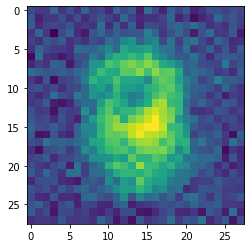

epochs... 4701
epochs... 4702
epochs... 4703
epochs... 4704
epochs... 4705
epochs... 4706
epochs... 4707
epochs... 4708
epochs... 4709
epochs... 4710
epochs... 4711
epochs... 4712
epochs... 4713
epochs... 4714
epochs... 4715
epochs... 4716
epochs... 4717
epochs... 4718
epochs... 4719
epochs... 4720
epochs... 4721
epochs... 4722
epochs... 4723
epochs... 4724
epochs... 4725
epochs... 4726
epochs... 4727
epochs... 4728
epochs... 4729
epochs... 4730
epochs... 4731
epochs... 4732
epochs... 4733
epochs... 4734
epochs... 4735
epochs... 4736
epochs... 4737
epochs... 4738
epochs... 4739
epochs... 4740
epochs... 4741
epochs... 4742
epochs... 4743
epochs... 4744
epochs... 4745
epochs... 4746
epochs... 4747
epochs... 4748
epochs... 4749
epochs... 4750
epochs... 4751
epochs... 4752
epochs... 4753
epochs... 4754
epochs... 4755
epochs... 4756
epochs... 4757
epochs... 4758
epochs... 4759
epochs... 4760
epochs... 4761
epochs... 4762
epochs... 4763
epochs... 4764
epochs... 4765
epochs... 4766
epochs... 

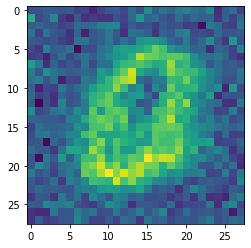

epochs... 4801
epochs... 4802
epochs... 4803
epochs... 4804
epochs... 4805
epochs... 4806
epochs... 4807
epochs... 4808
epochs... 4809
epochs... 4810
epochs... 4811
epochs... 4812
epochs... 4813
epochs... 4814
epochs... 4815
epochs... 4816
epochs... 4817
epochs... 4818
epochs... 4819
epochs... 4820
epochs... 4821
epochs... 4822
epochs... 4823
epochs... 4824
epochs... 4825
epochs... 4826
epochs... 4827
epochs... 4828
epochs... 4829
epochs... 4830
epochs... 4831
epochs... 4832
epochs... 4833
epochs... 4834
epochs... 4835
epochs... 4836
epochs... 4837
epochs... 4838
epochs... 4839
epochs... 4840
epochs... 4841
epochs... 4842
epochs... 4843
epochs... 4844
epochs... 4845
epochs... 4846
epochs... 4847
epochs... 4848
epochs... 4849
epochs... 4850
epochs... 4851
epochs... 4852
epochs... 4853
epochs... 4854
epochs... 4855
epochs... 4856
epochs... 4857
epochs... 4858
epochs... 4859
epochs... 4860
epochs... 4861
epochs... 4862
epochs... 4863
epochs... 4864
epochs... 4865
epochs... 4866
epochs... 

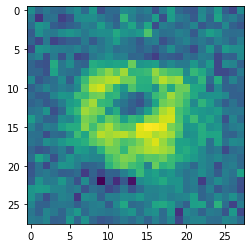

epochs... 4901
epochs... 4902
epochs... 4903
epochs... 4904
epochs... 4905
epochs... 4906
epochs... 4907
epochs... 4908
epochs... 4909
epochs... 4910
epochs... 4911
epochs... 4912
epochs... 4913
epochs... 4914
epochs... 4915
epochs... 4916
epochs... 4917
epochs... 4918
epochs... 4919
epochs... 4920
epochs... 4921
epochs... 4922
epochs... 4923
epochs... 4924
epochs... 4925
epochs... 4926
epochs... 4927
epochs... 4928
epochs... 4929
epochs... 4930
epochs... 4931
epochs... 4932
epochs... 4933
epochs... 4934
epochs... 4935
epochs... 4936
epochs... 4937
epochs... 4938
epochs... 4939
epochs... 4940
epochs... 4941
epochs... 4942
epochs... 4943
epochs... 4944
epochs... 4945
epochs... 4946
epochs... 4947
epochs... 4948
epochs... 4949
epochs... 4950
epochs... 4951
epochs... 4952
epochs... 4953
epochs... 4954
epochs... 4955
epochs... 4956
epochs... 4957
epochs... 4958
epochs... 4959
epochs... 4960
epochs... 4961
epochs... 4962
epochs... 4963
epochs... 4964
epochs... 4965
epochs... 4966
epochs... 

In [32]:
gan.train(x_train, epochs=5000, batch_size=500, plot=True, img_shape=(28, 28), rgb=False)

#### RESULT

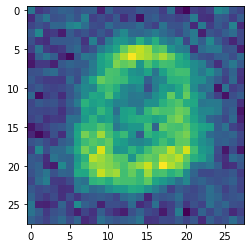

In [33]:
gan.plot_result((28, 28), False)

### FRUITS 360

#### DATA

In [41]:
def get_dataset(gray=False, size=None):
    
    train_path = "fruits-360/Training/"
    test_path = "fruits-360/Test/"
    x_train, x_test = [], []
    
    for filename in os.listdir(train_path):
        
        for fruit_file in os.listdir(train_path + filename):
            
            image = cv2.imread(train_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            if size is not None:
                image = cv2.resize(image, size)
            
            x_train.append(image)
            
    for filename in os.listdir(test_path):
        
        for fruit_file in os.listdir(test_path + filename):
            
            image = cv2.imread(test_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
            if size is not None:
                image = cv2.resize(image, size)
            
            x_test.append(image)
    
    
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    
    return x_train, x_test

x_train shape: (67692, 28, 28, 3)
x_test shape: (22688, 28, 28, 3)
Training examples


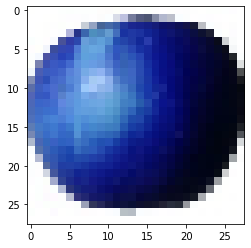

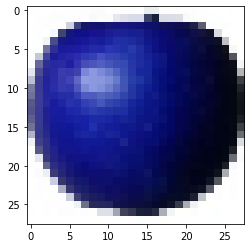

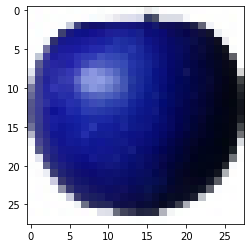

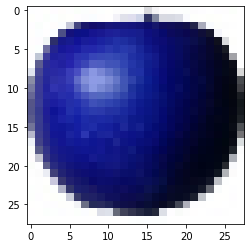

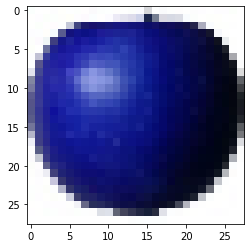

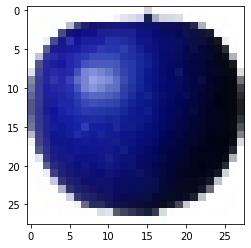

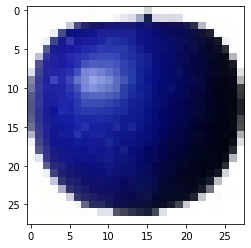

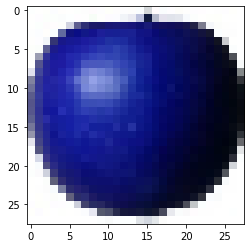

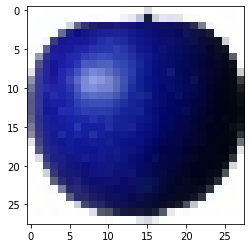

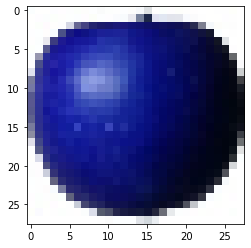

Test examples


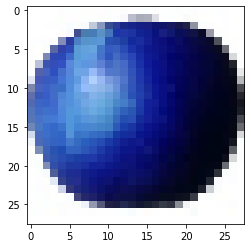

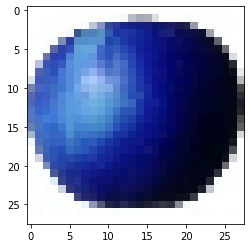

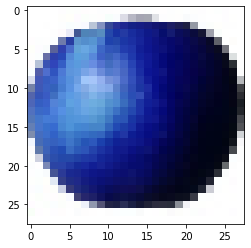

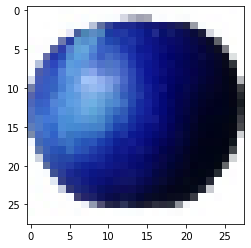

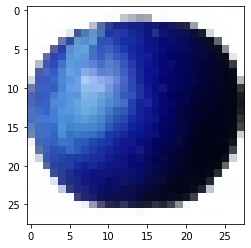

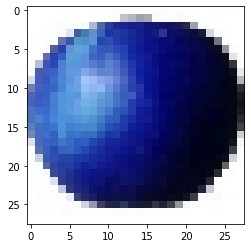

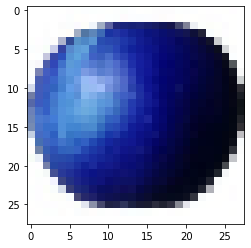

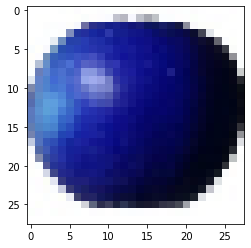

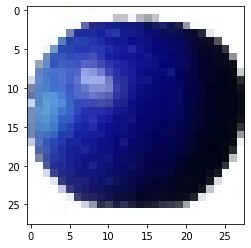

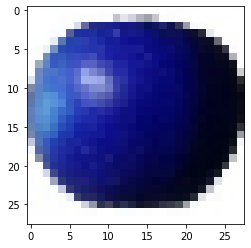

In [42]:
x_train, x_test = get_dataset(False, (28, 28))

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

In [43]:
x_train = x_train.reshape(x_train.shape[0], 2352) / 255.0
x_test = x_test.reshape(x_test.shape[0], 2352) / 255.0
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (67692, 2352)
x_test shape: (22688, 2352)


#### MODEL

In [44]:
gan = Gan(2352, 100)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 200)               20200     
_________________________________________________________________
leaky_re_lu_64 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_65 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 2352)              237552    
Total params: 277,852
Trainable params: 277,852
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_33"
_________________________________________________________________
Layer (type)            

#### TRAIN

epochs... 0


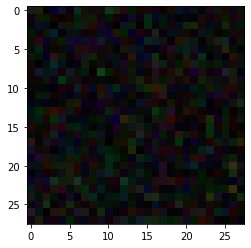

epochs... 1
epochs... 2
epochs... 3
epochs... 4
epochs... 5
epochs... 6
epochs... 7
epochs... 8
epochs... 9
epochs... 10
epochs... 11
epochs... 12
epochs... 13
epochs... 14
epochs... 15
epochs... 16
epochs... 17
epochs... 18
epochs... 19
epochs... 20
epochs... 21
epochs... 22
epochs... 23
epochs... 24
epochs... 25
epochs... 26
epochs... 27
epochs... 28
epochs... 29
epochs... 30
epochs... 31
epochs... 32
epochs... 33
epochs... 34
epochs... 35
epochs... 36
epochs... 37
epochs... 38
epochs... 39
epochs... 40
epochs... 41
epochs... 42
epochs... 43
epochs... 44
epochs... 45
epochs... 46
epochs... 47
epochs... 48
epochs... 49
epochs... 50
epochs... 51
epochs... 52
epochs... 53
epochs... 54
epochs... 55
epochs... 56
epochs... 57
epochs... 58
epochs... 59
epochs... 60
epochs... 61
epochs... 62
epochs... 63
epochs... 64
epochs... 65
epochs... 66
epochs... 67
epochs... 68
epochs... 69
epochs... 70
epochs... 71
epochs... 72
epochs... 73
epochs... 74
epochs... 75
epochs... 76
epochs... 77
epochs..

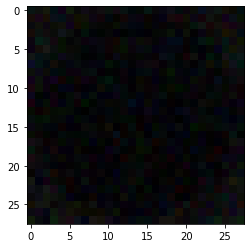

epochs... 101
epochs... 102
epochs... 103
epochs... 104
epochs... 105
epochs... 106
epochs... 107
epochs... 108
epochs... 109
epochs... 110
epochs... 111
epochs... 112
epochs... 113
epochs... 114
epochs... 115
epochs... 116
epochs... 117
epochs... 118
epochs... 119
epochs... 120
epochs... 121
epochs... 122
epochs... 123
epochs... 124
epochs... 125
epochs... 126
epochs... 127
epochs... 128
epochs... 129
epochs... 130
epochs... 131
epochs... 132
epochs... 133
epochs... 134
epochs... 135
epochs... 136
epochs... 137
epochs... 138
epochs... 139
epochs... 140
epochs... 141
epochs... 142
epochs... 143
epochs... 144
epochs... 145
epochs... 146
epochs... 147
epochs... 148
epochs... 149
epochs... 150
epochs... 151
epochs... 152
epochs... 153
epochs... 154
epochs... 155
epochs... 156
epochs... 157
epochs... 158
epochs... 159
epochs... 160
epochs... 161
epochs... 162
epochs... 163
epochs... 164
epochs... 165
epochs... 166
epochs... 167
epochs... 168
epochs... 169
epochs... 170
epochs... 171
epochs

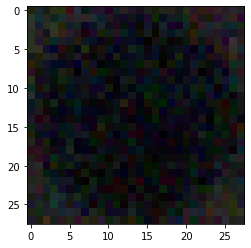

epochs... 201
epochs... 202
epochs... 203
epochs... 204
epochs... 205
epochs... 206
epochs... 207
epochs... 208
epochs... 209
epochs... 210
epochs... 211
epochs... 212
epochs... 213
epochs... 214
epochs... 215
epochs... 216
epochs... 217
epochs... 218
epochs... 219
epochs... 220
epochs... 221
epochs... 222
epochs... 223
epochs... 224
epochs... 225
epochs... 226
epochs... 227
epochs... 228
epochs... 229
epochs... 230
epochs... 231
epochs... 232
epochs... 233
epochs... 234
epochs... 235
epochs... 236
epochs... 237
epochs... 238
epochs... 239
epochs... 240
epochs... 241
epochs... 242
epochs... 243
epochs... 244
epochs... 245
epochs... 246
epochs... 247
epochs... 248
epochs... 249
epochs... 250
epochs... 251
epochs... 252
epochs... 253
epochs... 254
epochs... 255
epochs... 256
epochs... 257
epochs... 258
epochs... 259
epochs... 260
epochs... 261
epochs... 262
epochs... 263
epochs... 264
epochs... 265
epochs... 266
epochs... 267
epochs... 268
epochs... 269
epochs... 270
epochs... 271
epochs

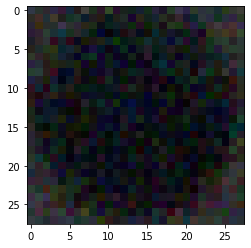

epochs... 301
epochs... 302
epochs... 303
epochs... 304
epochs... 305
epochs... 306
epochs... 307
epochs... 308
epochs... 309
epochs... 310
epochs... 311
epochs... 312
epochs... 313
epochs... 314
epochs... 315
epochs... 316
epochs... 317
epochs... 318
epochs... 319
epochs... 320
epochs... 321
epochs... 322
epochs... 323
epochs... 324
epochs... 325
epochs... 326
epochs... 327
epochs... 328
epochs... 329
epochs... 330
epochs... 331
epochs... 332
epochs... 333
epochs... 334
epochs... 335
epochs... 336
epochs... 337
epochs... 338
epochs... 339
epochs... 340
epochs... 341
epochs... 342
epochs... 343
epochs... 344
epochs... 345
epochs... 346
epochs... 347
epochs... 348
epochs... 349
epochs... 350
epochs... 351
epochs... 352
epochs... 353
epochs... 354
epochs... 355
epochs... 356
epochs... 357
epochs... 358
epochs... 359
epochs... 360
epochs... 361
epochs... 362
epochs... 363
epochs... 364
epochs... 365
epochs... 366
epochs... 367
epochs... 368
epochs... 369
epochs... 370
epochs... 371
epochs

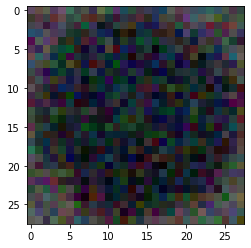

epochs... 401
epochs... 402
epochs... 403
epochs... 404
epochs... 405
epochs... 406
epochs... 407
epochs... 408
epochs... 409
epochs... 410
epochs... 411
epochs... 412
epochs... 413
epochs... 414
epochs... 415
epochs... 416
epochs... 417
epochs... 418
epochs... 419
epochs... 420
epochs... 421
epochs... 422
epochs... 423
epochs... 424
epochs... 425
epochs... 426
epochs... 427
epochs... 428
epochs... 429
epochs... 430
epochs... 431
epochs... 432
epochs... 433
epochs... 434
epochs... 435
epochs... 436
epochs... 437
epochs... 438
epochs... 439
epochs... 440
epochs... 441
epochs... 442
epochs... 443
epochs... 444
epochs... 445
epochs... 446
epochs... 447
epochs... 448
epochs... 449
epochs... 450
epochs... 451
epochs... 452
epochs... 453
epochs... 454
epochs... 455
epochs... 456
epochs... 457
epochs... 458
epochs... 459
epochs... 460
epochs... 461
epochs... 462
epochs... 463
epochs... 464
epochs... 465
epochs... 466
epochs... 467
epochs... 468
epochs... 469
epochs... 470
epochs... 471
epochs

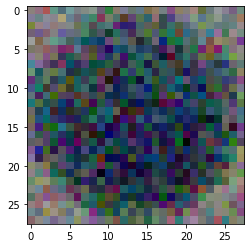

epochs... 501
epochs... 502
epochs... 503
epochs... 504
epochs... 505
epochs... 506
epochs... 507
epochs... 508
epochs... 509
epochs... 510
epochs... 511
epochs... 512
epochs... 513
epochs... 514
epochs... 515
epochs... 516
epochs... 517
epochs... 518
epochs... 519
epochs... 520
epochs... 521
epochs... 522
epochs... 523
epochs... 524
epochs... 525
epochs... 526
epochs... 527
epochs... 528
epochs... 529
epochs... 530
epochs... 531
epochs... 532
epochs... 533
epochs... 534
epochs... 535
epochs... 536
epochs... 537
epochs... 538
epochs... 539
epochs... 540
epochs... 541
epochs... 542
epochs... 543
epochs... 544
epochs... 545
epochs... 546
epochs... 547
epochs... 548
epochs... 549
epochs... 550
epochs... 551
epochs... 552
epochs... 553
epochs... 554
epochs... 555
epochs... 556
epochs... 557
epochs... 558
epochs... 559
epochs... 560
epochs... 561
epochs... 562
epochs... 563
epochs... 564
epochs... 565
epochs... 566
epochs... 567
epochs... 568
epochs... 569
epochs... 570
epochs... 571
epochs

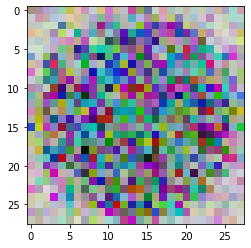

epochs... 601
epochs... 602
epochs... 603
epochs... 604
epochs... 605
epochs... 606
epochs... 607
epochs... 608
epochs... 609
epochs... 610
epochs... 611
epochs... 612
epochs... 613
epochs... 614
epochs... 615
epochs... 616
epochs... 617
epochs... 618
epochs... 619
epochs... 620
epochs... 621
epochs... 622
epochs... 623
epochs... 624
epochs... 625
epochs... 626
epochs... 627
epochs... 628
epochs... 629
epochs... 630
epochs... 631
epochs... 632
epochs... 633
epochs... 634
epochs... 635
epochs... 636
epochs... 637
epochs... 638
epochs... 639
epochs... 640
epochs... 641
epochs... 642
epochs... 643
epochs... 644
epochs... 645
epochs... 646
epochs... 647
epochs... 648
epochs... 649
epochs... 650
epochs... 651
epochs... 652
epochs... 653
epochs... 654
epochs... 655
epochs... 656
epochs... 657
epochs... 658
epochs... 659
epochs... 660
epochs... 661
epochs... 662
epochs... 663
epochs... 664
epochs... 665
epochs... 666
epochs... 667
epochs... 668
epochs... 669
epochs... 670
epochs... 671
epochs

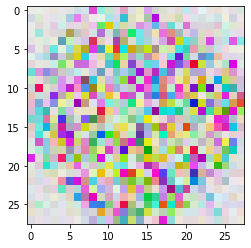

epochs... 701
epochs... 702
epochs... 703
epochs... 704
epochs... 705
epochs... 706
epochs... 707
epochs... 708
epochs... 709
epochs... 710
epochs... 711
epochs... 712
epochs... 713
epochs... 714
epochs... 715
epochs... 716
epochs... 717
epochs... 718
epochs... 719
epochs... 720
epochs... 721
epochs... 722
epochs... 723
epochs... 724
epochs... 725
epochs... 726
epochs... 727
epochs... 728
epochs... 729
epochs... 730
epochs... 731
epochs... 732
epochs... 733
epochs... 734
epochs... 735
epochs... 736
epochs... 737
epochs... 738
epochs... 739
epochs... 740
epochs... 741
epochs... 742
epochs... 743
epochs... 744
epochs... 745
epochs... 746
epochs... 747
epochs... 748
epochs... 749
epochs... 750
epochs... 751
epochs... 752
epochs... 753
epochs... 754
epochs... 755
epochs... 756
epochs... 757
epochs... 758
epochs... 759
epochs... 760
epochs... 761
epochs... 762
epochs... 763
epochs... 764
epochs... 765
epochs... 766
epochs... 767
epochs... 768
epochs... 769
epochs... 770
epochs... 771
epochs

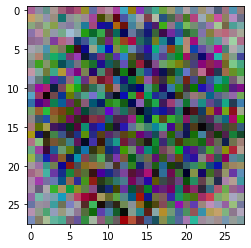

epochs... 801
epochs... 802
epochs... 803
epochs... 804
epochs... 805
epochs... 806
epochs... 807
epochs... 808
epochs... 809
epochs... 810
epochs... 811
epochs... 812
epochs... 813
epochs... 814
epochs... 815
epochs... 816
epochs... 817
epochs... 818
epochs... 819
epochs... 820
epochs... 821
epochs... 822
epochs... 823
epochs... 824
epochs... 825
epochs... 826
epochs... 827
epochs... 828
epochs... 829
epochs... 830
epochs... 831
epochs... 832
epochs... 833
epochs... 834
epochs... 835
epochs... 836
epochs... 837
epochs... 838
epochs... 839
epochs... 840
epochs... 841
epochs... 842
epochs... 843
epochs... 844
epochs... 845
epochs... 846
epochs... 847
epochs... 848
epochs... 849
epochs... 850
epochs... 851
epochs... 852
epochs... 853
epochs... 854
epochs... 855
epochs... 856
epochs... 857
epochs... 858
epochs... 859
epochs... 860
epochs... 861
epochs... 862
epochs... 863
epochs... 864
epochs... 865
epochs... 866
epochs... 867
epochs... 868
epochs... 869
epochs... 870
epochs... 871
epochs

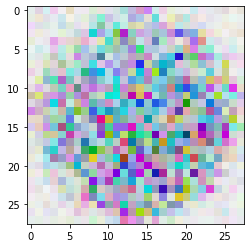

epochs... 901
epochs... 902
epochs... 903
epochs... 904
epochs... 905
epochs... 906
epochs... 907
epochs... 908
epochs... 909
epochs... 910
epochs... 911
epochs... 912
epochs... 913
epochs... 914
epochs... 915
epochs... 916
epochs... 917
epochs... 918
epochs... 919
epochs... 920
epochs... 921
epochs... 922
epochs... 923
epochs... 924
epochs... 925
epochs... 926
epochs... 927
epochs... 928
epochs... 929
epochs... 930
epochs... 931
epochs... 932
epochs... 933
epochs... 934
epochs... 935
epochs... 936
epochs... 937
epochs... 938
epochs... 939
epochs... 940
epochs... 941
epochs... 942
epochs... 943
epochs... 944
epochs... 945
epochs... 946
epochs... 947
epochs... 948
epochs... 949
epochs... 950
epochs... 951
epochs... 952
epochs... 953
epochs... 954
epochs... 955
epochs... 956
epochs... 957
epochs... 958
epochs... 959
epochs... 960
epochs... 961
epochs... 962
epochs... 963
epochs... 964
epochs... 965
epochs... 966
epochs... 967
epochs... 968
epochs... 969
epochs... 970
epochs... 971
epochs

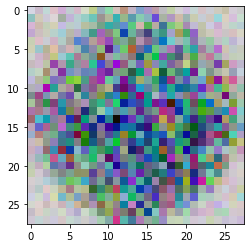

epochs... 1001
epochs... 1002
epochs... 1003
epochs... 1004
epochs... 1005
epochs... 1006
epochs... 1007
epochs... 1008
epochs... 1009
epochs... 1010
epochs... 1011
epochs... 1012
epochs... 1013
epochs... 1014
epochs... 1015
epochs... 1016
epochs... 1017
epochs... 1018
epochs... 1019
epochs... 1020
epochs... 1021
epochs... 1022
epochs... 1023
epochs... 1024
epochs... 1025
epochs... 1026
epochs... 1027
epochs... 1028
epochs... 1029
epochs... 1030
epochs... 1031
epochs... 1032
epochs... 1033
epochs... 1034
epochs... 1035
epochs... 1036
epochs... 1037
epochs... 1038
epochs... 1039
epochs... 1040
epochs... 1041
epochs... 1042
epochs... 1043
epochs... 1044
epochs... 1045
epochs... 1046
epochs... 1047
epochs... 1048
epochs... 1049
epochs... 1050
epochs... 1051
epochs... 1052
epochs... 1053
epochs... 1054
epochs... 1055
epochs... 1056
epochs... 1057
epochs... 1058
epochs... 1059
epochs... 1060
epochs... 1061
epochs... 1062
epochs... 1063
epochs... 1064
epochs... 1065
epochs... 1066
epochs... 

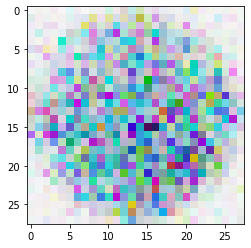

epochs... 1101
epochs... 1102
epochs... 1103
epochs... 1104
epochs... 1105
epochs... 1106
epochs... 1107
epochs... 1108
epochs... 1109
epochs... 1110
epochs... 1111
epochs... 1112
epochs... 1113
epochs... 1114
epochs... 1115
epochs... 1116
epochs... 1117
epochs... 1118
epochs... 1119
epochs... 1120
epochs... 1121
epochs... 1122
epochs... 1123
epochs... 1124
epochs... 1125
epochs... 1126
epochs... 1127
epochs... 1128
epochs... 1129
epochs... 1130
epochs... 1131
epochs... 1132
epochs... 1133
epochs... 1134
epochs... 1135
epochs... 1136
epochs... 1137
epochs... 1138
epochs... 1139
epochs... 1140
epochs... 1141
epochs... 1142
epochs... 1143
epochs... 1144
epochs... 1145
epochs... 1146
epochs... 1147
epochs... 1148
epochs... 1149
epochs... 1150
epochs... 1151
epochs... 1152
epochs... 1153
epochs... 1154
epochs... 1155
epochs... 1156
epochs... 1157
epochs... 1158
epochs... 1159
epochs... 1160
epochs... 1161
epochs... 1162
epochs... 1163
epochs... 1164
epochs... 1165
epochs... 1166
epochs... 

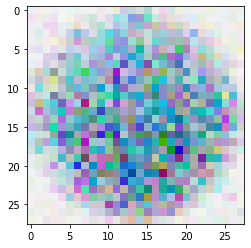

epochs... 1201
epochs... 1202
epochs... 1203
epochs... 1204
epochs... 1205
epochs... 1206
epochs... 1207
epochs... 1208
epochs... 1209
epochs... 1210
epochs... 1211
epochs... 1212
epochs... 1213
epochs... 1214
epochs... 1215
epochs... 1216
epochs... 1217
epochs... 1218
epochs... 1219
epochs... 1220
epochs... 1221
epochs... 1222
epochs... 1223
epochs... 1224
epochs... 1225
epochs... 1226
epochs... 1227
epochs... 1228
epochs... 1229
epochs... 1230
epochs... 1231
epochs... 1232
epochs... 1233
epochs... 1234
epochs... 1235
epochs... 1236
epochs... 1237
epochs... 1238
epochs... 1239
epochs... 1240
epochs... 1241
epochs... 1242
epochs... 1243
epochs... 1244
epochs... 1245
epochs... 1246
epochs... 1247
epochs... 1248
epochs... 1249
epochs... 1250
epochs... 1251
epochs... 1252
epochs... 1253
epochs... 1254
epochs... 1255
epochs... 1256
epochs... 1257
epochs... 1258
epochs... 1259
epochs... 1260
epochs... 1261
epochs... 1262
epochs... 1263
epochs... 1264
epochs... 1265
epochs... 1266
epochs... 

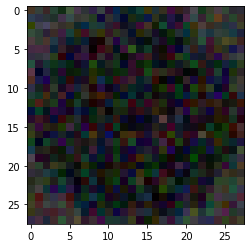

epochs... 1301
epochs... 1302
epochs... 1303
epochs... 1304
epochs... 1305
epochs... 1306
epochs... 1307
epochs... 1308
epochs... 1309
epochs... 1310
epochs... 1311
epochs... 1312
epochs... 1313
epochs... 1314
epochs... 1315
epochs... 1316
epochs... 1317
epochs... 1318
epochs... 1319
epochs... 1320
epochs... 1321
epochs... 1322
epochs... 1323
epochs... 1324
epochs... 1325
epochs... 1326
epochs... 1327
epochs... 1328
epochs... 1329
epochs... 1330
epochs... 1331
epochs... 1332
epochs... 1333
epochs... 1334
epochs... 1335
epochs... 1336
epochs... 1337
epochs... 1338
epochs... 1339
epochs... 1340
epochs... 1341
epochs... 1342
epochs... 1343
epochs... 1344
epochs... 1345
epochs... 1346
epochs... 1347
epochs... 1348
epochs... 1349
epochs... 1350
epochs... 1351
epochs... 1352
epochs... 1353
epochs... 1354
epochs... 1355
epochs... 1356
epochs... 1357
epochs... 1358
epochs... 1359
epochs... 1360
epochs... 1361
epochs... 1362
epochs... 1363
epochs... 1364
epochs... 1365
epochs... 1366
epochs... 

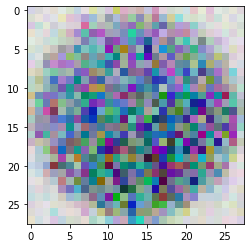

epochs... 1401
epochs... 1402
epochs... 1403
epochs... 1404
epochs... 1405
epochs... 1406
epochs... 1407
epochs... 1408
epochs... 1409
epochs... 1410
epochs... 1411
epochs... 1412
epochs... 1413
epochs... 1414
epochs... 1415
epochs... 1416
epochs... 1417
epochs... 1418
epochs... 1419
epochs... 1420
epochs... 1421
epochs... 1422
epochs... 1423
epochs... 1424
epochs... 1425
epochs... 1426
epochs... 1427
epochs... 1428
epochs... 1429
epochs... 1430
epochs... 1431
epochs... 1432
epochs... 1433
epochs... 1434
epochs... 1435
epochs... 1436
epochs... 1437
epochs... 1438
epochs... 1439
epochs... 1440
epochs... 1441
epochs... 1442
epochs... 1443
epochs... 1444
epochs... 1445
epochs... 1446
epochs... 1447
epochs... 1448
epochs... 1449
epochs... 1450
epochs... 1451
epochs... 1452
epochs... 1453
epochs... 1454
epochs... 1455
epochs... 1456
epochs... 1457
epochs... 1458
epochs... 1459
epochs... 1460
epochs... 1461
epochs... 1462
epochs... 1463
epochs... 1464
epochs... 1465
epochs... 1466
epochs... 

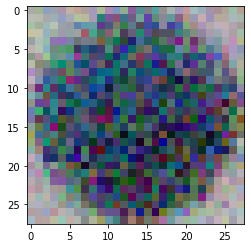

epochs... 1501
epochs... 1502
epochs... 1503
epochs... 1504
epochs... 1505
epochs... 1506
epochs... 1507
epochs... 1508
epochs... 1509
epochs... 1510
epochs... 1511
epochs... 1512
epochs... 1513
epochs... 1514
epochs... 1515
epochs... 1516
epochs... 1517
epochs... 1518
epochs... 1519
epochs... 1520
epochs... 1521
epochs... 1522
epochs... 1523
epochs... 1524
epochs... 1525
epochs... 1526
epochs... 1527
epochs... 1528
epochs... 1529
epochs... 1530
epochs... 1531
epochs... 1532
epochs... 1533
epochs... 1534
epochs... 1535
epochs... 1536
epochs... 1537
epochs... 1538
epochs... 1539
epochs... 1540
epochs... 1541
epochs... 1542
epochs... 1543
epochs... 1544
epochs... 1545
epochs... 1546
epochs... 1547
epochs... 1548
epochs... 1549
epochs... 1550
epochs... 1551
epochs... 1552
epochs... 1553
epochs... 1554
epochs... 1555
epochs... 1556
epochs... 1557
epochs... 1558
epochs... 1559
epochs... 1560
epochs... 1561
epochs... 1562
epochs... 1563
epochs... 1564
epochs... 1565
epochs... 1566
epochs... 

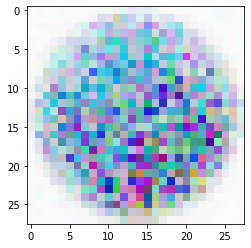

epochs... 1601
epochs... 1602
epochs... 1603
epochs... 1604
epochs... 1605
epochs... 1606
epochs... 1607
epochs... 1608
epochs... 1609
epochs... 1610
epochs... 1611
epochs... 1612
epochs... 1613
epochs... 1614
epochs... 1615
epochs... 1616
epochs... 1617
epochs... 1618
epochs... 1619
epochs... 1620
epochs... 1621
epochs... 1622
epochs... 1623
epochs... 1624
epochs... 1625
epochs... 1626
epochs... 1627
epochs... 1628
epochs... 1629
epochs... 1630
epochs... 1631
epochs... 1632
epochs... 1633
epochs... 1634
epochs... 1635
epochs... 1636
epochs... 1637
epochs... 1638
epochs... 1639
epochs... 1640
epochs... 1641
epochs... 1642
epochs... 1643
epochs... 1644
epochs... 1645
epochs... 1646
epochs... 1647
epochs... 1648
epochs... 1649
epochs... 1650
epochs... 1651
epochs... 1652
epochs... 1653
epochs... 1654
epochs... 1655
epochs... 1656
epochs... 1657
epochs... 1658
epochs... 1659
epochs... 1660
epochs... 1661
epochs... 1662
epochs... 1663
epochs... 1664
epochs... 1665
epochs... 1666
epochs... 

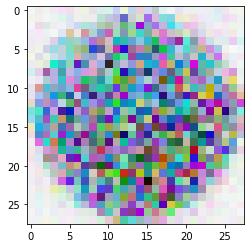

epochs... 1701
epochs... 1702
epochs... 1703
epochs... 1704
epochs... 1705
epochs... 1706
epochs... 1707
epochs... 1708
epochs... 1709
epochs... 1710
epochs... 1711
epochs... 1712
epochs... 1713
epochs... 1714
epochs... 1715
epochs... 1716
epochs... 1717
epochs... 1718
epochs... 1719
epochs... 1720
epochs... 1721
epochs... 1722
epochs... 1723
epochs... 1724
epochs... 1725
epochs... 1726
epochs... 1727
epochs... 1728
epochs... 1729
epochs... 1730
epochs... 1731
epochs... 1732
epochs... 1733
epochs... 1734
epochs... 1735
epochs... 1736
epochs... 1737
epochs... 1738
epochs... 1739
epochs... 1740
epochs... 1741
epochs... 1742
epochs... 1743
epochs... 1744
epochs... 1745
epochs... 1746
epochs... 1747
epochs... 1748
epochs... 1749
epochs... 1750
epochs... 1751
epochs... 1752
epochs... 1753
epochs... 1754
epochs... 1755
epochs... 1756
epochs... 1757
epochs... 1758
epochs... 1759
epochs... 1760
epochs... 1761
epochs... 1762
epochs... 1763
epochs... 1764
epochs... 1765
epochs... 1766
epochs... 

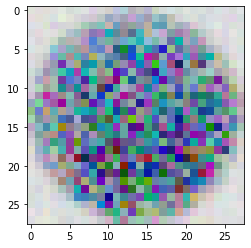

epochs... 1801
epochs... 1802
epochs... 1803
epochs... 1804
epochs... 1805
epochs... 1806
epochs... 1807
epochs... 1808
epochs... 1809
epochs... 1810
epochs... 1811
epochs... 1812
epochs... 1813
epochs... 1814
epochs... 1815
epochs... 1816
epochs... 1817
epochs... 1818
epochs... 1819
epochs... 1820
epochs... 1821
epochs... 1822
epochs... 1823
epochs... 1824
epochs... 1825
epochs... 1826
epochs... 1827
epochs... 1828
epochs... 1829
epochs... 1830
epochs... 1831
epochs... 1832
epochs... 1833
epochs... 1834
epochs... 1835
epochs... 1836
epochs... 1837
epochs... 1838
epochs... 1839
epochs... 1840
epochs... 1841
epochs... 1842
epochs... 1843
epochs... 1844
epochs... 1845
epochs... 1846
epochs... 1847
epochs... 1848
epochs... 1849
epochs... 1850
epochs... 1851
epochs... 1852
epochs... 1853
epochs... 1854
epochs... 1855
epochs... 1856
epochs... 1857
epochs... 1858
epochs... 1859
epochs... 1860
epochs... 1861
epochs... 1862
epochs... 1863
epochs... 1864
epochs... 1865
epochs... 1866
epochs... 

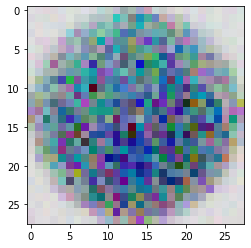

epochs... 1901
epochs... 1902
epochs... 1903
epochs... 1904
epochs... 1905
epochs... 1906
epochs... 1907
epochs... 1908
epochs... 1909
epochs... 1910
epochs... 1911
epochs... 1912
epochs... 1913
epochs... 1914
epochs... 1915
epochs... 1916
epochs... 1917
epochs... 1918
epochs... 1919
epochs... 1920
epochs... 1921
epochs... 1922
epochs... 1923
epochs... 1924
epochs... 1925
epochs... 1926
epochs... 1927
epochs... 1928
epochs... 1929
epochs... 1930
epochs... 1931
epochs... 1932
epochs... 1933
epochs... 1934
epochs... 1935
epochs... 1936
epochs... 1937
epochs... 1938
epochs... 1939
epochs... 1940
epochs... 1941
epochs... 1942
epochs... 1943
epochs... 1944
epochs... 1945
epochs... 1946
epochs... 1947
epochs... 1948
epochs... 1949
epochs... 1950
epochs... 1951
epochs... 1952
epochs... 1953
epochs... 1954
epochs... 1955
epochs... 1956
epochs... 1957
epochs... 1958
epochs... 1959
epochs... 1960
epochs... 1961
epochs... 1962
epochs... 1963
epochs... 1964
epochs... 1965
epochs... 1966
epochs... 

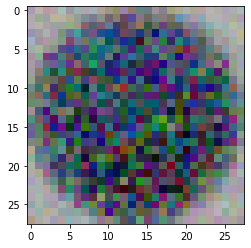

epochs... 2001
epochs... 2002
epochs... 2003
epochs... 2004
epochs... 2005
epochs... 2006
epochs... 2007
epochs... 2008
epochs... 2009
epochs... 2010
epochs... 2011
epochs... 2012
epochs... 2013
epochs... 2014
epochs... 2015
epochs... 2016
epochs... 2017
epochs... 2018
epochs... 2019
epochs... 2020
epochs... 2021
epochs... 2022
epochs... 2023
epochs... 2024
epochs... 2025
epochs... 2026
epochs... 2027
epochs... 2028
epochs... 2029
epochs... 2030
epochs... 2031
epochs... 2032
epochs... 2033
epochs... 2034
epochs... 2035
epochs... 2036
epochs... 2037
epochs... 2038
epochs... 2039
epochs... 2040
epochs... 2041
epochs... 2042
epochs... 2043
epochs... 2044
epochs... 2045
epochs... 2046
epochs... 2047
epochs... 2048
epochs... 2049
epochs... 2050
epochs... 2051
epochs... 2052
epochs... 2053
epochs... 2054
epochs... 2055
epochs... 2056
epochs... 2057
epochs... 2058
epochs... 2059
epochs... 2060
epochs... 2061
epochs... 2062
epochs... 2063
epochs... 2064
epochs... 2065
epochs... 2066
epochs... 

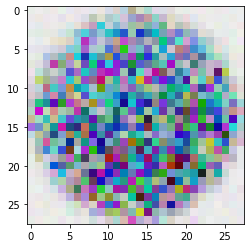

epochs... 2101
epochs... 2102
epochs... 2103
epochs... 2104
epochs... 2105
epochs... 2106
epochs... 2107
epochs... 2108
epochs... 2109
epochs... 2110
epochs... 2111
epochs... 2112
epochs... 2113
epochs... 2114
epochs... 2115
epochs... 2116
epochs... 2117
epochs... 2118
epochs... 2119
epochs... 2120
epochs... 2121
epochs... 2122
epochs... 2123
epochs... 2124
epochs... 2125
epochs... 2126
epochs... 2127
epochs... 2128
epochs... 2129
epochs... 2130
epochs... 2131
epochs... 2132
epochs... 2133
epochs... 2134
epochs... 2135
epochs... 2136
epochs... 2137
epochs... 2138
epochs... 2139
epochs... 2140
epochs... 2141
epochs... 2142
epochs... 2143
epochs... 2144
epochs... 2145
epochs... 2146
epochs... 2147
epochs... 2148
epochs... 2149
epochs... 2150
epochs... 2151
epochs... 2152
epochs... 2153
epochs... 2154
epochs... 2155
epochs... 2156
epochs... 2157
epochs... 2158
epochs... 2159
epochs... 2160
epochs... 2161
epochs... 2162
epochs... 2163
epochs... 2164
epochs... 2165
epochs... 2166
epochs... 

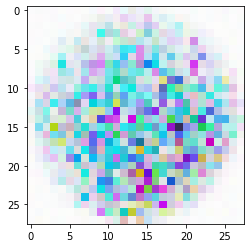

epochs... 2201
epochs... 2202
epochs... 2203
epochs... 2204
epochs... 2205
epochs... 2206
epochs... 2207
epochs... 2208
epochs... 2209
epochs... 2210
epochs... 2211
epochs... 2212
epochs... 2213
epochs... 2214
epochs... 2215
epochs... 2216
epochs... 2217
epochs... 2218
epochs... 2219
epochs... 2220
epochs... 2221
epochs... 2222
epochs... 2223
epochs... 2224
epochs... 2225
epochs... 2226
epochs... 2227
epochs... 2228
epochs... 2229
epochs... 2230
epochs... 2231
epochs... 2232
epochs... 2233
epochs... 2234
epochs... 2235
epochs... 2236
epochs... 2237
epochs... 2238
epochs... 2239
epochs... 2240
epochs... 2241
epochs... 2242
epochs... 2243
epochs... 2244
epochs... 2245
epochs... 2246
epochs... 2247
epochs... 2248
epochs... 2249
epochs... 2250
epochs... 2251
epochs... 2252
epochs... 2253
epochs... 2254
epochs... 2255
epochs... 2256
epochs... 2257
epochs... 2258
epochs... 2259
epochs... 2260
epochs... 2261
epochs... 2262
epochs... 2263
epochs... 2264
epochs... 2265
epochs... 2266
epochs... 

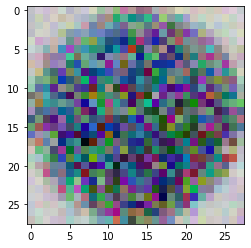

epochs... 2301
epochs... 2302
epochs... 2303
epochs... 2304
epochs... 2305
epochs... 2306
epochs... 2307
epochs... 2308
epochs... 2309
epochs... 2310
epochs... 2311
epochs... 2312
epochs... 2313
epochs... 2314
epochs... 2315
epochs... 2316
epochs... 2317
epochs... 2318
epochs... 2319
epochs... 2320
epochs... 2321
epochs... 2322
epochs... 2323
epochs... 2324
epochs... 2325
epochs... 2326
epochs... 2327
epochs... 2328
epochs... 2329
epochs... 2330
epochs... 2331
epochs... 2332
epochs... 2333
epochs... 2334
epochs... 2335
epochs... 2336
epochs... 2337
epochs... 2338
epochs... 2339
epochs... 2340
epochs... 2341
epochs... 2342
epochs... 2343
epochs... 2344
epochs... 2345
epochs... 2346
epochs... 2347
epochs... 2348
epochs... 2349
epochs... 2350
epochs... 2351
epochs... 2352
epochs... 2353
epochs... 2354
epochs... 2355
epochs... 2356
epochs... 2357
epochs... 2358
epochs... 2359
epochs... 2360
epochs... 2361
epochs... 2362
epochs... 2363
epochs... 2364
epochs... 2365
epochs... 2366
epochs... 

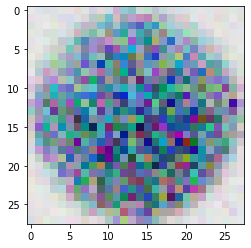

epochs... 2401
epochs... 2402
epochs... 2403
epochs... 2404
epochs... 2405
epochs... 2406
epochs... 2407
epochs... 2408
epochs... 2409
epochs... 2410
epochs... 2411
epochs... 2412
epochs... 2413
epochs... 2414
epochs... 2415
epochs... 2416
epochs... 2417
epochs... 2418
epochs... 2419
epochs... 2420
epochs... 2421
epochs... 2422
epochs... 2423
epochs... 2424
epochs... 2425
epochs... 2426
epochs... 2427
epochs... 2428
epochs... 2429
epochs... 2430
epochs... 2431
epochs... 2432
epochs... 2433
epochs... 2434
epochs... 2435
epochs... 2436
epochs... 2437
epochs... 2438
epochs... 2439
epochs... 2440
epochs... 2441
epochs... 2442
epochs... 2443
epochs... 2444
epochs... 2445
epochs... 2446
epochs... 2447
epochs... 2448
epochs... 2449
epochs... 2450
epochs... 2451
epochs... 2452
epochs... 2453
epochs... 2454
epochs... 2455
epochs... 2456
epochs... 2457
epochs... 2458
epochs... 2459
epochs... 2460
epochs... 2461
epochs... 2462
epochs... 2463
epochs... 2464
epochs... 2465
epochs... 2466
epochs... 

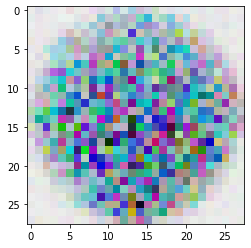

epochs... 2501
epochs... 2502
epochs... 2503
epochs... 2504
epochs... 2505
epochs... 2506
epochs... 2507
epochs... 2508
epochs... 2509
epochs... 2510
epochs... 2511
epochs... 2512
epochs... 2513
epochs... 2514
epochs... 2515
epochs... 2516
epochs... 2517
epochs... 2518
epochs... 2519
epochs... 2520
epochs... 2521
epochs... 2522
epochs... 2523
epochs... 2524
epochs... 2525
epochs... 2526
epochs... 2527
epochs... 2528
epochs... 2529
epochs... 2530
epochs... 2531
epochs... 2532
epochs... 2533
epochs... 2534
epochs... 2535
epochs... 2536
epochs... 2537
epochs... 2538
epochs... 2539
epochs... 2540
epochs... 2541
epochs... 2542
epochs... 2543
epochs... 2544
epochs... 2545
epochs... 2546
epochs... 2547
epochs... 2548
epochs... 2549
epochs... 2550
epochs... 2551
epochs... 2552
epochs... 2553
epochs... 2554
epochs... 2555
epochs... 2556
epochs... 2557
epochs... 2558
epochs... 2559
epochs... 2560
epochs... 2561
epochs... 2562
epochs... 2563
epochs... 2564
epochs... 2565
epochs... 2566
epochs... 

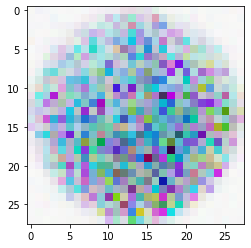

epochs... 2601
epochs... 2602
epochs... 2603
epochs... 2604
epochs... 2605
epochs... 2606
epochs... 2607
epochs... 2608
epochs... 2609
epochs... 2610
epochs... 2611
epochs... 2612
epochs... 2613
epochs... 2614
epochs... 2615
epochs... 2616
epochs... 2617
epochs... 2618
epochs... 2619
epochs... 2620
epochs... 2621
epochs... 2622
epochs... 2623
epochs... 2624
epochs... 2625
epochs... 2626
epochs... 2627
epochs... 2628
epochs... 2629
epochs... 2630
epochs... 2631
epochs... 2632
epochs... 2633
epochs... 2634
epochs... 2635
epochs... 2636
epochs... 2637
epochs... 2638
epochs... 2639
epochs... 2640
epochs... 2641
epochs... 2642
epochs... 2643
epochs... 2644
epochs... 2645
epochs... 2646
epochs... 2647
epochs... 2648
epochs... 2649
epochs... 2650
epochs... 2651
epochs... 2652
epochs... 2653
epochs... 2654
epochs... 2655
epochs... 2656
epochs... 2657
epochs... 2658
epochs... 2659
epochs... 2660
epochs... 2661
epochs... 2662
epochs... 2663
epochs... 2664
epochs... 2665
epochs... 2666
epochs... 

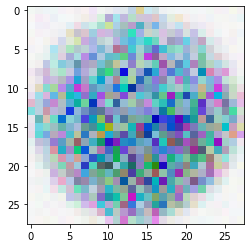

epochs... 2701
epochs... 2702
epochs... 2703
epochs... 2704
epochs... 2705
epochs... 2706
epochs... 2707
epochs... 2708
epochs... 2709
epochs... 2710
epochs... 2711
epochs... 2712
epochs... 2713
epochs... 2714
epochs... 2715
epochs... 2716
epochs... 2717
epochs... 2718
epochs... 2719
epochs... 2720
epochs... 2721
epochs... 2722
epochs... 2723
epochs... 2724
epochs... 2725
epochs... 2726
epochs... 2727
epochs... 2728
epochs... 2729
epochs... 2730
epochs... 2731
epochs... 2732
epochs... 2733
epochs... 2734
epochs... 2735
epochs... 2736
epochs... 2737
epochs... 2738
epochs... 2739
epochs... 2740
epochs... 2741
epochs... 2742
epochs... 2743
epochs... 2744
epochs... 2745
epochs... 2746
epochs... 2747
epochs... 2748
epochs... 2749
epochs... 2750
epochs... 2751
epochs... 2752
epochs... 2753
epochs... 2754
epochs... 2755
epochs... 2756
epochs... 2757
epochs... 2758
epochs... 2759
epochs... 2760
epochs... 2761
epochs... 2762
epochs... 2763
epochs... 2764
epochs... 2765
epochs... 2766
epochs... 

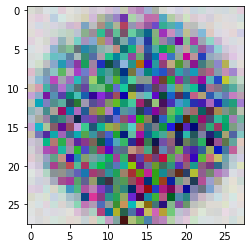

epochs... 2801
epochs... 2802
epochs... 2803
epochs... 2804
epochs... 2805
epochs... 2806
epochs... 2807
epochs... 2808
epochs... 2809
epochs... 2810
epochs... 2811
epochs... 2812
epochs... 2813
epochs... 2814
epochs... 2815
epochs... 2816
epochs... 2817
epochs... 2818
epochs... 2819
epochs... 2820
epochs... 2821
epochs... 2822
epochs... 2823
epochs... 2824
epochs... 2825
epochs... 2826
epochs... 2827
epochs... 2828
epochs... 2829
epochs... 2830
epochs... 2831
epochs... 2832
epochs... 2833
epochs... 2834
epochs... 2835
epochs... 2836
epochs... 2837
epochs... 2838
epochs... 2839
epochs... 2840
epochs... 2841
epochs... 2842
epochs... 2843
epochs... 2844
epochs... 2845
epochs... 2846
epochs... 2847
epochs... 2848
epochs... 2849
epochs... 2850
epochs... 2851
epochs... 2852
epochs... 2853
epochs... 2854
epochs... 2855
epochs... 2856
epochs... 2857
epochs... 2858
epochs... 2859
epochs... 2860
epochs... 2861
epochs... 2862
epochs... 2863
epochs... 2864
epochs... 2865
epochs... 2866
epochs... 

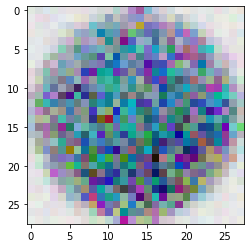

epochs... 2901
epochs... 2902
epochs... 2903
epochs... 2904
epochs... 2905
epochs... 2906
epochs... 2907
epochs... 2908
epochs... 2909
epochs... 2910
epochs... 2911
epochs... 2912
epochs... 2913
epochs... 2914
epochs... 2915
epochs... 2916
epochs... 2917
epochs... 2918
epochs... 2919
epochs... 2920
epochs... 2921
epochs... 2922
epochs... 2923
epochs... 2924
epochs... 2925
epochs... 2926
epochs... 2927
epochs... 2928
epochs... 2929
epochs... 2930
epochs... 2931
epochs... 2932
epochs... 2933
epochs... 2934
epochs... 2935
epochs... 2936
epochs... 2937
epochs... 2938
epochs... 2939
epochs... 2940
epochs... 2941
epochs... 2942
epochs... 2943
epochs... 2944
epochs... 2945
epochs... 2946
epochs... 2947
epochs... 2948
epochs... 2949
epochs... 2950
epochs... 2951
epochs... 2952
epochs... 2953
epochs... 2954
epochs... 2955
epochs... 2956
epochs... 2957
epochs... 2958
epochs... 2959
epochs... 2960
epochs... 2961
epochs... 2962
epochs... 2963
epochs... 2964
epochs... 2965
epochs... 2966
epochs... 

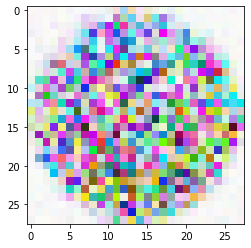

epochs... 3001
epochs... 3002
epochs... 3003
epochs... 3004
epochs... 3005
epochs... 3006
epochs... 3007
epochs... 3008
epochs... 3009
epochs... 3010
epochs... 3011
epochs... 3012
epochs... 3013
epochs... 3014
epochs... 3015
epochs... 3016
epochs... 3017
epochs... 3018
epochs... 3019
epochs... 3020
epochs... 3021
epochs... 3022
epochs... 3023
epochs... 3024
epochs... 3025
epochs... 3026
epochs... 3027
epochs... 3028
epochs... 3029
epochs... 3030
epochs... 3031
epochs... 3032
epochs... 3033
epochs... 3034
epochs... 3035
epochs... 3036
epochs... 3037
epochs... 3038
epochs... 3039
epochs... 3040
epochs... 3041
epochs... 3042
epochs... 3043
epochs... 3044
epochs... 3045
epochs... 3046
epochs... 3047
epochs... 3048
epochs... 3049
epochs... 3050
epochs... 3051
epochs... 3052
epochs... 3053
epochs... 3054
epochs... 3055
epochs... 3056
epochs... 3057
epochs... 3058
epochs... 3059
epochs... 3060
epochs... 3061
epochs... 3062
epochs... 3063
epochs... 3064
epochs... 3065
epochs... 3066
epochs... 

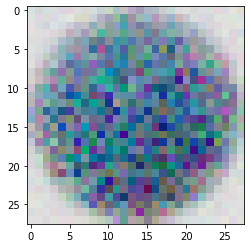

epochs... 3101
epochs... 3102
epochs... 3103
epochs... 3104
epochs... 3105
epochs... 3106
epochs... 3107
epochs... 3108
epochs... 3109
epochs... 3110
epochs... 3111
epochs... 3112
epochs... 3113
epochs... 3114
epochs... 3115
epochs... 3116
epochs... 3117
epochs... 3118
epochs... 3119
epochs... 3120
epochs... 3121
epochs... 3122
epochs... 3123
epochs... 3124
epochs... 3125
epochs... 3126
epochs... 3127
epochs... 3128
epochs... 3129
epochs... 3130
epochs... 3131
epochs... 3132
epochs... 3133
epochs... 3134
epochs... 3135
epochs... 3136
epochs... 3137
epochs... 3138
epochs... 3139
epochs... 3140
epochs... 3141
epochs... 3142
epochs... 3143
epochs... 3144
epochs... 3145
epochs... 3146
epochs... 3147
epochs... 3148
epochs... 3149
epochs... 3150
epochs... 3151
epochs... 3152
epochs... 3153
epochs... 3154
epochs... 3155
epochs... 3156
epochs... 3157
epochs... 3158
epochs... 3159
epochs... 3160
epochs... 3161
epochs... 3162
epochs... 3163
epochs... 3164
epochs... 3165
epochs... 3166
epochs... 

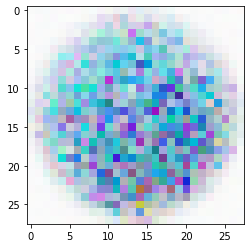

epochs... 3201
epochs... 3202
epochs... 3203
epochs... 3204
epochs... 3205
epochs... 3206
epochs... 3207
epochs... 3208
epochs... 3209
epochs... 3210
epochs... 3211
epochs... 3212
epochs... 3213
epochs... 3214
epochs... 3215
epochs... 3216
epochs... 3217
epochs... 3218
epochs... 3219
epochs... 3220
epochs... 3221
epochs... 3222
epochs... 3223
epochs... 3224
epochs... 3225
epochs... 3226
epochs... 3227
epochs... 3228
epochs... 3229
epochs... 3230
epochs... 3231
epochs... 3232
epochs... 3233
epochs... 3234
epochs... 3235
epochs... 3236
epochs... 3237
epochs... 3238
epochs... 3239
epochs... 3240
epochs... 3241
epochs... 3242
epochs... 3243
epochs... 3244
epochs... 3245
epochs... 3246
epochs... 3247
epochs... 3248
epochs... 3249
epochs... 3250
epochs... 3251
epochs... 3252
epochs... 3253
epochs... 3254
epochs... 3255
epochs... 3256
epochs... 3257
epochs... 3258
epochs... 3259
epochs... 3260
epochs... 3261
epochs... 3262
epochs... 3263
epochs... 3264
epochs... 3265
epochs... 3266
epochs... 

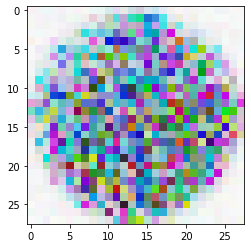

epochs... 3301
epochs... 3302
epochs... 3303
epochs... 3304
epochs... 3305
epochs... 3306
epochs... 3307
epochs... 3308
epochs... 3309
epochs... 3310
epochs... 3311
epochs... 3312
epochs... 3313
epochs... 3314
epochs... 3315
epochs... 3316
epochs... 3317
epochs... 3318
epochs... 3319
epochs... 3320
epochs... 3321
epochs... 3322
epochs... 3323
epochs... 3324
epochs... 3325
epochs... 3326
epochs... 3327
epochs... 3328
epochs... 3329
epochs... 3330
epochs... 3331
epochs... 3332
epochs... 3333
epochs... 3334
epochs... 3335
epochs... 3336
epochs... 3337
epochs... 3338
epochs... 3339
epochs... 3340
epochs... 3341
epochs... 3342
epochs... 3343
epochs... 3344
epochs... 3345
epochs... 3346
epochs... 3347
epochs... 3348
epochs... 3349
epochs... 3350
epochs... 3351
epochs... 3352
epochs... 3353
epochs... 3354
epochs... 3355
epochs... 3356
epochs... 3357
epochs... 3358
epochs... 3359
epochs... 3360
epochs... 3361
epochs... 3362
epochs... 3363
epochs... 3364
epochs... 3365
epochs... 3366
epochs... 

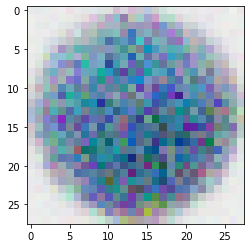

epochs... 3401
epochs... 3402
epochs... 3403
epochs... 3404
epochs... 3405
epochs... 3406
epochs... 3407
epochs... 3408
epochs... 3409
epochs... 3410
epochs... 3411
epochs... 3412
epochs... 3413
epochs... 3414
epochs... 3415
epochs... 3416
epochs... 3417
epochs... 3418
epochs... 3419
epochs... 3420
epochs... 3421
epochs... 3422
epochs... 3423
epochs... 3424
epochs... 3425
epochs... 3426
epochs... 3427
epochs... 3428
epochs... 3429
epochs... 3430
epochs... 3431
epochs... 3432
epochs... 3433
epochs... 3434
epochs... 3435
epochs... 3436
epochs... 3437
epochs... 3438
epochs... 3439
epochs... 3440
epochs... 3441
epochs... 3442
epochs... 3443
epochs... 3444
epochs... 3445
epochs... 3446
epochs... 3447
epochs... 3448
epochs... 3449
epochs... 3450
epochs... 3451
epochs... 3452
epochs... 3453
epochs... 3454
epochs... 3455
epochs... 3456
epochs... 3457
epochs... 3458
epochs... 3459
epochs... 3460
epochs... 3461
epochs... 3462
epochs... 3463
epochs... 3464
epochs... 3465
epochs... 3466
epochs... 

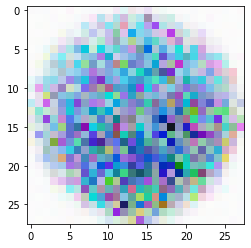

epochs... 3501
epochs... 3502
epochs... 3503
epochs... 3504
epochs... 3505
epochs... 3506
epochs... 3507
epochs... 3508
epochs... 3509
epochs... 3510
epochs... 3511
epochs... 3512
epochs... 3513
epochs... 3514
epochs... 3515
epochs... 3516
epochs... 3517
epochs... 3518
epochs... 3519
epochs... 3520
epochs... 3521
epochs... 3522
epochs... 3523
epochs... 3524
epochs... 3525
epochs... 3526
epochs... 3527
epochs... 3528
epochs... 3529
epochs... 3530
epochs... 3531
epochs... 3532
epochs... 3533
epochs... 3534
epochs... 3535
epochs... 3536
epochs... 3537
epochs... 3538
epochs... 3539
epochs... 3540
epochs... 3541
epochs... 3542
epochs... 3543
epochs... 3544
epochs... 3545
epochs... 3546
epochs... 3547
epochs... 3548
epochs... 3549
epochs... 3550
epochs... 3551
epochs... 3552
epochs... 3553
epochs... 3554
epochs... 3555
epochs... 3556
epochs... 3557
epochs... 3558
epochs... 3559
epochs... 3560
epochs... 3561
epochs... 3562
epochs... 3563
epochs... 3564
epochs... 3565
epochs... 3566
epochs... 

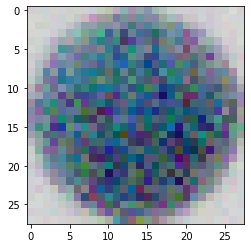

epochs... 3601
epochs... 3602
epochs... 3603
epochs... 3604
epochs... 3605
epochs... 3606
epochs... 3607
epochs... 3608
epochs... 3609
epochs... 3610
epochs... 3611
epochs... 3612
epochs... 3613
epochs... 3614
epochs... 3615
epochs... 3616
epochs... 3617
epochs... 3618
epochs... 3619
epochs... 3620
epochs... 3621
epochs... 3622
epochs... 3623
epochs... 3624
epochs... 3625
epochs... 3626
epochs... 3627
epochs... 3628
epochs... 3629
epochs... 3630
epochs... 3631
epochs... 3632
epochs... 3633
epochs... 3634
epochs... 3635
epochs... 3636
epochs... 3637
epochs... 3638
epochs... 3639
epochs... 3640
epochs... 3641
epochs... 3642
epochs... 3643
epochs... 3644
epochs... 3645
epochs... 3646
epochs... 3647
epochs... 3648
epochs... 3649
epochs... 3650
epochs... 3651
epochs... 3652
epochs... 3653
epochs... 3654
epochs... 3655
epochs... 3656
epochs... 3657
epochs... 3658
epochs... 3659
epochs... 3660
epochs... 3661
epochs... 3662
epochs... 3663
epochs... 3664
epochs... 3665
epochs... 3666
epochs... 

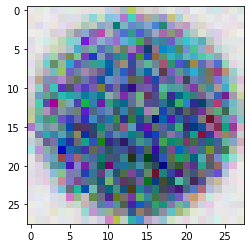

epochs... 3701
epochs... 3702
epochs... 3703
epochs... 3704
epochs... 3705
epochs... 3706
epochs... 3707
epochs... 3708
epochs... 3709
epochs... 3710
epochs... 3711
epochs... 3712
epochs... 3713
epochs... 3714
epochs... 3715
epochs... 3716
epochs... 3717
epochs... 3718
epochs... 3719
epochs... 3720
epochs... 3721
epochs... 3722
epochs... 3723
epochs... 3724
epochs... 3725
epochs... 3726
epochs... 3727
epochs... 3728
epochs... 3729
epochs... 3730
epochs... 3731
epochs... 3732
epochs... 3733
epochs... 3734
epochs... 3735
epochs... 3736
epochs... 3737
epochs... 3738
epochs... 3739
epochs... 3740
epochs... 3741
epochs... 3742
epochs... 3743
epochs... 3744
epochs... 3745
epochs... 3746
epochs... 3747
epochs... 3748
epochs... 3749
epochs... 3750
epochs... 3751
epochs... 3752
epochs... 3753
epochs... 3754
epochs... 3755
epochs... 3756
epochs... 3757
epochs... 3758
epochs... 3759
epochs... 3760
epochs... 3761
epochs... 3762
epochs... 3763
epochs... 3764
epochs... 3765
epochs... 3766
epochs... 

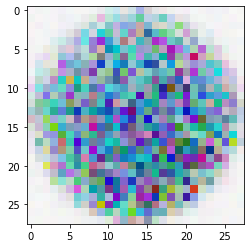

epochs... 3801
epochs... 3802
epochs... 3803
epochs... 3804
epochs... 3805
epochs... 3806
epochs... 3807
epochs... 3808
epochs... 3809
epochs... 3810
epochs... 3811
epochs... 3812
epochs... 3813
epochs... 3814
epochs... 3815
epochs... 3816
epochs... 3817
epochs... 3818
epochs... 3819
epochs... 3820
epochs... 3821
epochs... 3822
epochs... 3823
epochs... 3824
epochs... 3825
epochs... 3826
epochs... 3827
epochs... 3828
epochs... 3829
epochs... 3830
epochs... 3831
epochs... 3832
epochs... 3833
epochs... 3834
epochs... 3835
epochs... 3836
epochs... 3837
epochs... 3838
epochs... 3839
epochs... 3840
epochs... 3841
epochs... 3842
epochs... 3843
epochs... 3844
epochs... 3845
epochs... 3846
epochs... 3847
epochs... 3848
epochs... 3849
epochs... 3850
epochs... 3851
epochs... 3852
epochs... 3853
epochs... 3854
epochs... 3855
epochs... 3856
epochs... 3857
epochs... 3858
epochs... 3859
epochs... 3860
epochs... 3861
epochs... 3862
epochs... 3863
epochs... 3864
epochs... 3865
epochs... 3866
epochs... 

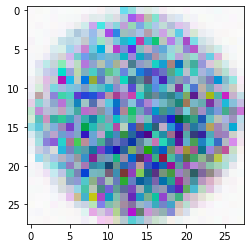

epochs... 3901
epochs... 3902
epochs... 3903
epochs... 3904
epochs... 3905
epochs... 3906
epochs... 3907
epochs... 3908
epochs... 3909
epochs... 3910
epochs... 3911
epochs... 3912
epochs... 3913
epochs... 3914
epochs... 3915
epochs... 3916
epochs... 3917
epochs... 3918
epochs... 3919
epochs... 3920
epochs... 3921
epochs... 3922
epochs... 3923
epochs... 3924
epochs... 3925
epochs... 3926
epochs... 3927
epochs... 3928
epochs... 3929
epochs... 3930
epochs... 3931
epochs... 3932
epochs... 3933
epochs... 3934
epochs... 3935
epochs... 3936
epochs... 3937
epochs... 3938
epochs... 3939
epochs... 3940
epochs... 3941
epochs... 3942
epochs... 3943
epochs... 3944
epochs... 3945
epochs... 3946
epochs... 3947
epochs... 3948
epochs... 3949
epochs... 3950
epochs... 3951
epochs... 3952
epochs... 3953
epochs... 3954
epochs... 3955
epochs... 3956
epochs... 3957
epochs... 3958
epochs... 3959
epochs... 3960
epochs... 3961
epochs... 3962
epochs... 3963
epochs... 3964
epochs... 3965
epochs... 3966
epochs... 

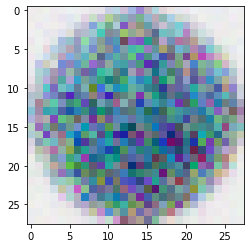

epochs... 4001
epochs... 4002
epochs... 4003
epochs... 4004
epochs... 4005
epochs... 4006
epochs... 4007
epochs... 4008
epochs... 4009
epochs... 4010
epochs... 4011
epochs... 4012
epochs... 4013
epochs... 4014
epochs... 4015
epochs... 4016
epochs... 4017
epochs... 4018
epochs... 4019
epochs... 4020
epochs... 4021
epochs... 4022
epochs... 4023
epochs... 4024
epochs... 4025
epochs... 4026
epochs... 4027
epochs... 4028
epochs... 4029
epochs... 4030
epochs... 4031
epochs... 4032
epochs... 4033
epochs... 4034
epochs... 4035
epochs... 4036
epochs... 4037
epochs... 4038
epochs... 4039
epochs... 4040
epochs... 4041
epochs... 4042
epochs... 4043
epochs... 4044
epochs... 4045
epochs... 4046
epochs... 4047
epochs... 4048
epochs... 4049
epochs... 4050
epochs... 4051
epochs... 4052
epochs... 4053
epochs... 4054
epochs... 4055
epochs... 4056
epochs... 4057
epochs... 4058
epochs... 4059
epochs... 4060
epochs... 4061
epochs... 4062
epochs... 4063
epochs... 4064
epochs... 4065
epochs... 4066
epochs... 

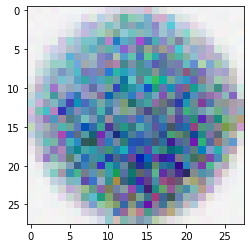

epochs... 4101
epochs... 4102
epochs... 4103
epochs... 4104
epochs... 4105
epochs... 4106
epochs... 4107
epochs... 4108
epochs... 4109
epochs... 4110
epochs... 4111
epochs... 4112
epochs... 4113
epochs... 4114
epochs... 4115
epochs... 4116
epochs... 4117
epochs... 4118
epochs... 4119
epochs... 4120
epochs... 4121
epochs... 4122
epochs... 4123
epochs... 4124
epochs... 4125
epochs... 4126
epochs... 4127
epochs... 4128
epochs... 4129
epochs... 4130
epochs... 4131
epochs... 4132
epochs... 4133
epochs... 4134
epochs... 4135
epochs... 4136
epochs... 4137
epochs... 4138
epochs... 4139
epochs... 4140
epochs... 4141
epochs... 4142
epochs... 4143
epochs... 4144
epochs... 4145
epochs... 4146
epochs... 4147
epochs... 4148
epochs... 4149
epochs... 4150
epochs... 4151
epochs... 4152
epochs... 4153
epochs... 4154
epochs... 4155
epochs... 4156
epochs... 4157
epochs... 4158
epochs... 4159
epochs... 4160
epochs... 4161
epochs... 4162
epochs... 4163
epochs... 4164
epochs... 4165
epochs... 4166
epochs... 

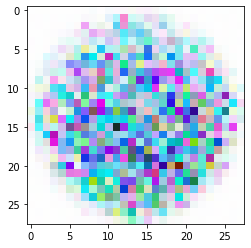

epochs... 4201
epochs... 4202
epochs... 4203
epochs... 4204
epochs... 4205
epochs... 4206
epochs... 4207
epochs... 4208
epochs... 4209
epochs... 4210
epochs... 4211
epochs... 4212
epochs... 4213
epochs... 4214
epochs... 4215
epochs... 4216
epochs... 4217
epochs... 4218
epochs... 4219
epochs... 4220
epochs... 4221
epochs... 4222
epochs... 4223
epochs... 4224
epochs... 4225
epochs... 4226
epochs... 4227
epochs... 4228
epochs... 4229
epochs... 4230
epochs... 4231
epochs... 4232
epochs... 4233
epochs... 4234
epochs... 4235
epochs... 4236
epochs... 4237
epochs... 4238
epochs... 4239
epochs... 4240
epochs... 4241
epochs... 4242
epochs... 4243
epochs... 4244
epochs... 4245
epochs... 4246
epochs... 4247
epochs... 4248
epochs... 4249
epochs... 4250
epochs... 4251
epochs... 4252
epochs... 4253
epochs... 4254
epochs... 4255
epochs... 4256
epochs... 4257
epochs... 4258
epochs... 4259
epochs... 4260
epochs... 4261
epochs... 4262
epochs... 4263
epochs... 4264
epochs... 4265
epochs... 4266
epochs... 

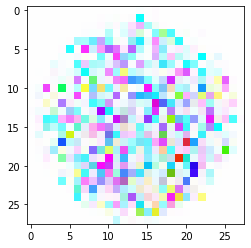

epochs... 4301
epochs... 4302
epochs... 4303
epochs... 4304
epochs... 4305
epochs... 4306
epochs... 4307
epochs... 4308
epochs... 4309
epochs... 4310
epochs... 4311
epochs... 4312
epochs... 4313
epochs... 4314
epochs... 4315
epochs... 4316
epochs... 4317
epochs... 4318
epochs... 4319
epochs... 4320
epochs... 4321
epochs... 4322
epochs... 4323
epochs... 4324
epochs... 4325
epochs... 4326
epochs... 4327
epochs... 4328
epochs... 4329
epochs... 4330
epochs... 4331
epochs... 4332
epochs... 4333
epochs... 4334
epochs... 4335
epochs... 4336
epochs... 4337
epochs... 4338
epochs... 4339
epochs... 4340
epochs... 4341
epochs... 4342
epochs... 4343
epochs... 4344
epochs... 4345
epochs... 4346
epochs... 4347
epochs... 4348
epochs... 4349
epochs... 4350
epochs... 4351
epochs... 4352
epochs... 4353
epochs... 4354
epochs... 4355
epochs... 4356
epochs... 4357
epochs... 4358
epochs... 4359
epochs... 4360
epochs... 4361
epochs... 4362
epochs... 4363
epochs... 4364
epochs... 4365
epochs... 4366
epochs... 

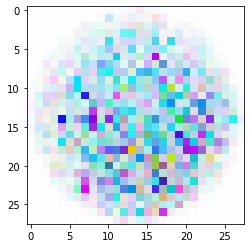

epochs... 4401
epochs... 4402
epochs... 4403
epochs... 4404
epochs... 4405
epochs... 4406
epochs... 4407
epochs... 4408
epochs... 4409
epochs... 4410
epochs... 4411
epochs... 4412
epochs... 4413
epochs... 4414
epochs... 4415
epochs... 4416
epochs... 4417
epochs... 4418
epochs... 4419
epochs... 4420
epochs... 4421
epochs... 4422
epochs... 4423
epochs... 4424
epochs... 4425
epochs... 4426
epochs... 4427
epochs... 4428
epochs... 4429
epochs... 4430
epochs... 4431
epochs... 4432
epochs... 4433
epochs... 4434
epochs... 4435
epochs... 4436
epochs... 4437
epochs... 4438
epochs... 4439
epochs... 4440
epochs... 4441
epochs... 4442
epochs... 4443
epochs... 4444
epochs... 4445
epochs... 4446
epochs... 4447
epochs... 4448
epochs... 4449
epochs... 4450
epochs... 4451
epochs... 4452
epochs... 4453
epochs... 4454
epochs... 4455
epochs... 4456
epochs... 4457
epochs... 4458
epochs... 4459
epochs... 4460
epochs... 4461
epochs... 4462
epochs... 4463
epochs... 4464
epochs... 4465
epochs... 4466
epochs... 

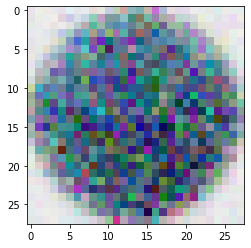

epochs... 4501
epochs... 4502
epochs... 4503
epochs... 4504
epochs... 4505
epochs... 4506
epochs... 4507
epochs... 4508
epochs... 4509
epochs... 4510
epochs... 4511
epochs... 4512
epochs... 4513
epochs... 4514
epochs... 4515
epochs... 4516
epochs... 4517
epochs... 4518
epochs... 4519
epochs... 4520
epochs... 4521
epochs... 4522
epochs... 4523
epochs... 4524
epochs... 4525
epochs... 4526
epochs... 4527
epochs... 4528
epochs... 4529
epochs... 4530
epochs... 4531
epochs... 4532
epochs... 4533
epochs... 4534
epochs... 4535
epochs... 4536
epochs... 4537
epochs... 4538
epochs... 4539
epochs... 4540
epochs... 4541
epochs... 4542
epochs... 4543
epochs... 4544
epochs... 4545
epochs... 4546
epochs... 4547
epochs... 4548
epochs... 4549
epochs... 4550
epochs... 4551
epochs... 4552
epochs... 4553
epochs... 4554
epochs... 4555
epochs... 4556
epochs... 4557
epochs... 4558
epochs... 4559
epochs... 4560
epochs... 4561
epochs... 4562
epochs... 4563
epochs... 4564
epochs... 4565
epochs... 4566
epochs... 

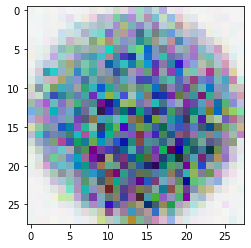

epochs... 4601
epochs... 4602
epochs... 4603
epochs... 4604
epochs... 4605
epochs... 4606
epochs... 4607
epochs... 4608
epochs... 4609
epochs... 4610
epochs... 4611
epochs... 4612
epochs... 4613
epochs... 4614
epochs... 4615
epochs... 4616
epochs... 4617
epochs... 4618
epochs... 4619
epochs... 4620
epochs... 4621
epochs... 4622
epochs... 4623
epochs... 4624
epochs... 4625
epochs... 4626
epochs... 4627
epochs... 4628
epochs... 4629
epochs... 4630
epochs... 4631
epochs... 4632
epochs... 4633
epochs... 4634
epochs... 4635
epochs... 4636
epochs... 4637
epochs... 4638
epochs... 4639
epochs... 4640
epochs... 4641
epochs... 4642
epochs... 4643
epochs... 4644
epochs... 4645
epochs... 4646
epochs... 4647
epochs... 4648
epochs... 4649
epochs... 4650
epochs... 4651
epochs... 4652
epochs... 4653
epochs... 4654
epochs... 4655
epochs... 4656
epochs... 4657
epochs... 4658
epochs... 4659
epochs... 4660
epochs... 4661
epochs... 4662
epochs... 4663
epochs... 4664
epochs... 4665
epochs... 4666
epochs... 

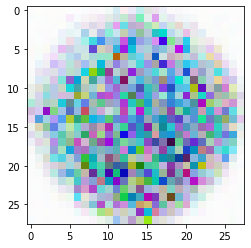

epochs... 4701
epochs... 4702
epochs... 4703
epochs... 4704
epochs... 4705
epochs... 4706
epochs... 4707
epochs... 4708
epochs... 4709
epochs... 4710
epochs... 4711
epochs... 4712
epochs... 4713
epochs... 4714
epochs... 4715
epochs... 4716
epochs... 4717
epochs... 4718
epochs... 4719
epochs... 4720
epochs... 4721
epochs... 4722
epochs... 4723
epochs... 4724
epochs... 4725
epochs... 4726
epochs... 4727
epochs... 4728
epochs... 4729
epochs... 4730
epochs... 4731
epochs... 4732
epochs... 4733
epochs... 4734
epochs... 4735
epochs... 4736
epochs... 4737
epochs... 4738
epochs... 4739
epochs... 4740
epochs... 4741
epochs... 4742
epochs... 4743
epochs... 4744
epochs... 4745
epochs... 4746
epochs... 4747
epochs... 4748
epochs... 4749
epochs... 4750
epochs... 4751
epochs... 4752
epochs... 4753
epochs... 4754
epochs... 4755
epochs... 4756
epochs... 4757
epochs... 4758
epochs... 4759
epochs... 4760
epochs... 4761
epochs... 4762
epochs... 4763
epochs... 4764
epochs... 4765
epochs... 4766
epochs... 

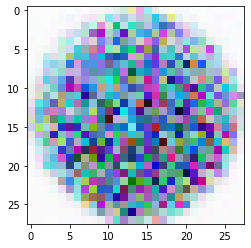

epochs... 4801
epochs... 4802
epochs... 4803
epochs... 4804
epochs... 4805
epochs... 4806
epochs... 4807
epochs... 4808
epochs... 4809
epochs... 4810
epochs... 4811
epochs... 4812
epochs... 4813
epochs... 4814
epochs... 4815
epochs... 4816
epochs... 4817
epochs... 4818
epochs... 4819
epochs... 4820
epochs... 4821
epochs... 4822
epochs... 4823
epochs... 4824
epochs... 4825
epochs... 4826
epochs... 4827
epochs... 4828
epochs... 4829
epochs... 4830
epochs... 4831
epochs... 4832
epochs... 4833
epochs... 4834
epochs... 4835
epochs... 4836
epochs... 4837
epochs... 4838
epochs... 4839
epochs... 4840
epochs... 4841
epochs... 4842
epochs... 4843
epochs... 4844
epochs... 4845
epochs... 4846
epochs... 4847
epochs... 4848
epochs... 4849
epochs... 4850
epochs... 4851
epochs... 4852
epochs... 4853
epochs... 4854
epochs... 4855
epochs... 4856
epochs... 4857
epochs... 4858
epochs... 4859
epochs... 4860
epochs... 4861
epochs... 4862
epochs... 4863
epochs... 4864
epochs... 4865
epochs... 4866
epochs... 

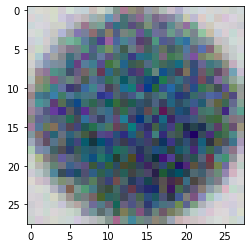

epochs... 4901
epochs... 4902
epochs... 4903
epochs... 4904
epochs... 4905
epochs... 4906
epochs... 4907
epochs... 4908
epochs... 4909
epochs... 4910
epochs... 4911
epochs... 4912
epochs... 4913
epochs... 4914
epochs... 4915
epochs... 4916
epochs... 4917
epochs... 4918
epochs... 4919
epochs... 4920
epochs... 4921
epochs... 4922
epochs... 4923
epochs... 4924
epochs... 4925
epochs... 4926
epochs... 4927
epochs... 4928
epochs... 4929
epochs... 4930
epochs... 4931
epochs... 4932
epochs... 4933
epochs... 4934
epochs... 4935
epochs... 4936
epochs... 4937
epochs... 4938
epochs... 4939
epochs... 4940
epochs... 4941
epochs... 4942
epochs... 4943
epochs... 4944
epochs... 4945
epochs... 4946
epochs... 4947
epochs... 4948
epochs... 4949
epochs... 4950
epochs... 4951
epochs... 4952
epochs... 4953
epochs... 4954
epochs... 4955
epochs... 4956
epochs... 4957
epochs... 4958
epochs... 4959
epochs... 4960
epochs... 4961
epochs... 4962
epochs... 4963
epochs... 4964
epochs... 4965
epochs... 4966
epochs... 

In [45]:
gan.train(x_train.astype("float64"), epochs=5000, batch_size=500, plot=True, img_shape=(28, 28, 3), rgb=True)

#### RESULT

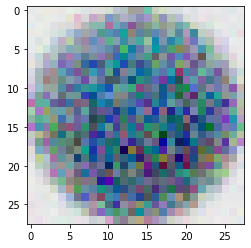

In [46]:
gan.plot_result((28, 28, 3), True)